Crime in Chicago has been worrisome to the Chicago PD. Reported crimes have been tracked on a daily basis since 2001 and have been provided in the project data file. The Chicago PD would like to drastically reduce the spate of violent crime reported in the city. Being effective involves knowing crime patterns and where they are likely to occur it also involved equipping the police department appropriately. They have recruited you to conduct full data Analytics and predictive modelling to uncover insights from the data that can be used effectively mobilize and respond to crimes in shorter time cycles. They are interested in gleaning any insight that can help them determine what type of crimes to prepare for, where these crimes are most likely to occur what day is of the week and periods to expect this crimes.

Task:
Conduct complete data Analytics and predictive modelling to;

Predict crime types by day and District

Predict violent and nonviolent crime by day period and ward

Build a model to predict where the next crime will happen by district.

# Data Preparation

Import libraries and dataset

In [3]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Import dataset and display the first five rows
df = pd.read_csv('crime_data_Proj1.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


Data cleaning and feature engineering

In [5]:
# Check dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [6]:
# Check for null values
df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [7]:
# Drop rows containing null values
df.dropna(inplace=True)

In [8]:
# Confirm if all null values are dropped
df.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [9]:
# Checking for the shape of df
df.shape

(2070581, 23)

In [10]:
# Check for duplicate rows
df.duplicated().value_counts()

False    2070581
dtype: int64

In [11]:
# Take 20,000 random sample of df
df_sample = df.sample(n=20000, random_state=20).reset_index(drop=True)  
df_sample.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2275728,8619442,HV292972,05/18/2012 10:45:00 PM,020XX W IRVING PARK RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,47.0,5.0,14,1161826.0,1926552.0,2012,02/04/2016 06:33:39 AM,41.954132,-87.680501,"(41.954132236, -87.680500777)"
1,1294910,7537868,HS341308,06/03/2010 07:25:00 PM,029XX W AUGUSTA BLVD,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,TAXICAB,False,...,26.0,24.0,11,1156789.0,1906518.0,2010,02/10/2018 03:50:01 PM,41.899261,-87.699562,"(41.899261233, -87.699561823)"
2,1648013,10289253,HY477371,10/26/2015 03:40:00 PM,057XX N NAGLE AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,GAS STATION,True,...,41.0,10.0,24,1132598.0,1937755.0,2015,02/10/2018 03:50:01 PM,41.985435,-87.787686,"(41.985435056, -87.787685839)"
3,2037746,4855457,HM470128,07/11/2006 10:00:00 PM,015XX N GREENVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1.0,24.0,14,1166112.0,1910203.0,2006,02/28/2018 03:56:25 PM,41.909179,-87.665213,"(41.909179024, -87.665213285)"
4,1032816,3455697,HK524704,07/30/2004 04:40:00 AM,108XX S RACINE AVE,0460,BATTERY,SIMPLE,STREET,False,...,34.0,75.0,08B,1170248.0,1833009.0,2004,02/10/2018 03:50:01 PM,41.697261,-87.652267,"(41.697260958, -87.652266575)"


In [12]:
# Check for repeated Primary Type
df_sample['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION',
       'BATTERY', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'THEFT', 'ASSAULT',
       'BURGLARY', 'OTHER OFFENSE', 'PROSTITUTION', 'CRIMINAL TRESPASS',
       'ROBBERY', 'WEAPONS VIOLATION', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'SEX OFFENSE', 'STALKING', 'INTIMIDATION',
       'CRIMINAL SEXUAL ASSAULT', 'KIDNAPPING',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON - CRIMINAL'], dtype=object)

In [13]:
# Replace wrongly spelled 'NON - CRIMINAL' with 'NON-CRIMINAL'
df_sample["Primary Type"].replace('NON - CRIMINAL', 'NON-CRIMINAL', inplace=True)
df_sample['Primary Type'].unique() 

array(['CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION',
       'BATTERY', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'THEFT', 'ASSAULT',
       'BURGLARY', 'OTHER OFFENSE', 'PROSTITUTION', 'CRIMINAL TRESPASS',
       'ROBBERY', 'WEAPONS VIOLATION', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'SEX OFFENSE', 'STALKING', 'INTIMIDATION',
       'CRIMINAL SEXUAL ASSAULT', 'KIDNAPPING',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING'], dtype=object)

In [14]:
# Check the shape of df_sample
df_sample.shape

(20000, 23)

In [15]:
# Create month, day and period columns
from dateutil.parser import parse
from datetime import datetime


tCol = df_sample.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

df_sample['month'] = monthList
df_sample['day'] = dayList
df_sample['period']= periodList
df_sample.head()

20000 20000 20000


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day,period
0,2275728,8619442,HV292972,05/18/2012 10:45:00 PM,020XX W IRVING PARK RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1161826.0,1926552.0,2012,02/04/2016 06:33:39 AM,41.954132,-87.680501,"(41.954132236, -87.680500777)",May,Fri,Night
1,1294910,7537868,HS341308,06/03/2010 07:25:00 PM,029XX W AUGUSTA BLVD,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,TAXICAB,False,...,1156789.0,1906518.0,2010,02/10/2018 03:50:01 PM,41.899261,-87.699562,"(41.899261233, -87.699561823)",Jun,Thu,Night
2,1648013,10289253,HY477371,10/26/2015 03:40:00 PM,057XX N NAGLE AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,GAS STATION,True,...,1132598.0,1937755.0,2015,02/10/2018 03:50:01 PM,41.985435,-87.787686,"(41.985435056, -87.787685839)",Oct,Mon,Afternoon
3,2037746,4855457,HM470128,07/11/2006 10:00:00 PM,015XX N GREENVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1166112.0,1910203.0,2006,02/28/2018 03:56:25 PM,41.909179,-87.665213,"(41.909179024, -87.665213285)",Jul,Tue,Night
4,1032816,3455697,HK524704,07/30/2004 04:40:00 AM,108XX S RACINE AVE,0460,BATTERY,SIMPLE,STREET,False,...,1170248.0,1833009.0,2004,02/10/2018 03:50:01 PM,41.697261,-87.652267,"(41.697260958, -87.652266575)",Jul,Fri,Morning


In [16]:
df_sample.day

0        Fri 
1        Thu 
2        Mon 
3        Tue 
4        Fri 
         ... 
19995    Wed 
19996    Mon 
19997    Sun 
19998    Sat 
19999    Sun 
Name: day, Length: 20000, dtype: object

In [17]:
# Create daytype column
wkList = []
for day in (df_sample.day).to_list():
    if day in ['Sat ', 'Sun ']:
        wkList.append('Weekend')
    else:
        wkList.append('Weekday')
df_sample['dayType'] = wkList  
df_sample.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day,period,dayType
0,2275728,8619442,HV292972,05/18/2012 10:45:00 PM,020XX W IRVING PARK RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1926552.0,2012,02/04/2016 06:33:39 AM,41.954132,-87.680501,"(41.954132236, -87.680500777)",May,Fri,Night,Weekday
1,1294910,7537868,HS341308,06/03/2010 07:25:00 PM,029XX W AUGUSTA BLVD,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,TAXICAB,False,...,1906518.0,2010,02/10/2018 03:50:01 PM,41.899261,-87.699562,"(41.899261233, -87.699561823)",Jun,Thu,Night,Weekday
2,1648013,10289253,HY477371,10/26/2015 03:40:00 PM,057XX N NAGLE AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,GAS STATION,True,...,1937755.0,2015,02/10/2018 03:50:01 PM,41.985435,-87.787686,"(41.985435056, -87.787685839)",Oct,Mon,Afternoon,Weekday
3,2037746,4855457,HM470128,07/11/2006 10:00:00 PM,015XX N GREENVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1910203.0,2006,02/28/2018 03:56:25 PM,41.909179,-87.665213,"(41.909179024, -87.665213285)",Jul,Tue,Night,Weekday
4,1032816,3455697,HK524704,07/30/2004 04:40:00 AM,108XX S RACINE AVE,0460,BATTERY,SIMPLE,STREET,False,...,1833009.0,2004,02/10/2018 03:50:01 PM,41.697261,-87.652267,"(41.697260958, -87.652266575)",Jul,Fri,Morning,Weekday


Create  'Violent Crime' column

In [18]:
# Check for the description of 'OTHER OFFENSE' to indentify the violent crimes among them by there description
df_other_violent_crime_description = df_sample[df_sample['Primary Type'] == 'OTHER OFFENSE']
df_other_violent_crime_description['Description'].unique()

array(['HARASSMENT BY TELEPHONE', 'OTHER VEHICLE OFFENSE',
       'TELEPHONE THREAT', 'VIOLATE ORDER OF PROTECTION',
       'OBSCENE TELEPHONE CALLS', 'OTHER WEAPONS VIOLATION',
       'VIO BAIL BOND: DOM VIOLENCE', 'ANIMAL FIGHTING',
       'POSSESSION OF BURGLARY TOOLS',
       'GUN OFFENDER: ANNUAL REGISTRATION', 'OTHER CRIME AGAINST PERSON',
       'HARASSMENT BY ELECTRONIC MEANS', 'VEHICLE TITLE/REG OFFENSE',
       'PAROLE VIOLATION', 'TAMPER WITH MOTOR VEHICLE',
       'ANIMAL ABUSE/NEGLECT', 'LICENSE VIOLATION',
       'FALSE/STOLEN/ALTERED TRP', 'SEX OFFENDER: FAIL TO REGISTER',
       'VIOLENT OFFENDER: ANNUAL REGISTRATION',
       'SEX OFFENDER: FAIL REG NEW ADD', 'OTHER CRIME INVOLVING PROPERTY',
       'VIOLATION OF CIVIL NO CONTACT ORDER',
       'GUN OFFENDER: DUTY TO REGISTER',
       'VIOLENT OFFENDER - ANNUAL REGISTRATION',
       'VEHICLE TITLE / REGISTRATION OFFENSE',
       'SEX OFFENDER: PROHIBITED ZONE', 'FALSE / STOLEN / ALTERED TRP',
       'PROBATION VIOLATION

In [19]:
#Create a violent crime column

# List of violent crimes
violent_crime_list = ['CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'BURGLARY', 'THEFT',
       'ROBBERY', 'HOMICIDE', 'ASSAULT', 'BATTERY', 'MOTOR VEHICLE THEFT',
       'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'WEAPONS VIOLATION', 'SEX OFFENSE',
       'ARSON', 'KIDNAPPING', 'STALKING',
       'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT']

# List of violent crimes from 'OTHER OFFENSE' DESCRIPTION
other_violent_crime_desc_list = ['HARASSMENT BY TELEPHONE', 'TELEPHONE THREAT',
       'HARASSMENT BY ELECTRONIC MEANS', 'OBSCENE TELEPHONE CALLS',
       'VIOLATE ORDER OF PROTECTION', 'OTHER CRIME AGAINST PERSON', 
        'OTHER WEAPONS VIOLATION', 'BOARD PLANE WITH WEAPON', 
        'VIOLENT OFFENDER: ANNUAL REGISTRATION',
       'VIOLENT OFFENDER - DUTY TO REGISTER',
       'HAZARDOUS MATERIALS VIOLATION']

# Assign 1's to violent crime and 0's to non-violent crime
df_sample['Violent Crime'] = df_sample['Primary Type'].isin(violent_crime_list).astype(int) | df_sample['Description'].isin(other_violent_crime_desc_list).astype(int) 
df_sample.head(50)                    

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Year,Updated On,Latitude,Longitude,Location,month,day,period,dayType,Violent Crime
0,2275728,8619442,HV292972,05/18/2012 10:45:00 PM,020XX W IRVING PARK RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,2012,02/04/2016 06:33:39 AM,41.954132,-87.680501,"(41.954132236, -87.680500777)",May,Fri,Night,Weekday,1
1,1294910,7537868,HS341308,06/03/2010 07:25:00 PM,029XX W AUGUSTA BLVD,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,TAXICAB,False,...,2010,02/10/2018 03:50:01 PM,41.899261,-87.699562,"(41.899261233, -87.699561823)",Jun,Thu,Night,Weekday,0
2,1648013,10289253,HY477371,10/26/2015 03:40:00 PM,057XX N NAGLE AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,GAS STATION,True,...,2015,02/10/2018 03:50:01 PM,41.985435,-87.787686,"(41.985435056, -87.787685839)",Oct,Mon,Afternoon,Weekday,1
3,2037746,4855457,HM470128,07/11/2006 10:00:00 PM,015XX N GREENVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,2006,02/28/2018 03:56:25 PM,41.909179,-87.665213,"(41.909179024, -87.665213285)",Jul,Tue,Night,Weekday,1
4,1032816,3455697,HK524704,07/30/2004 04:40:00 AM,108XX S RACINE AVE,0460,BATTERY,SIMPLE,STREET,False,...,2004,02/10/2018 03:50:01 PM,41.697261,-87.652267,"(41.697260958, -87.652266575)",Jul,Fri,Morning,Weekday,1
5,492238,3882518,HL258533,03/27/2005 04:45:00 PM,053XX S KOLIN AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,2005,02/28/2018 03:56:25 PM,41.795830,-87.731812,"(41.795830481, -87.731812422)",Mar,Sun,Evening,Weekend,1
6,1647285,5828524,HN636966,10/08/2007 11:35:00 PM,010XX N HAMLIN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,...,2007,02/28/2018 03:56:25 PM,41.899780,-87.721335,"(41.899779997, -87.721335223)",Oct,Mon,Night,Weekday,1
7,800538,8242288,HT475800,08/31/2011 11:30:00 PM,063XX N LEAVITT ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,2011,02/10/2018 03:50:01 PM,41.996223,-87.684941,"(41.996223264, -87.68494145)",Aug,Wed,Night,Weekday,1
8,1356561,6764224,HR179071,02/19/2009 07:34:21 PM,008XX E 86TH ST,2027,NARCOTICS,POSS: CRACK,STREET,True,...,2009,02/28/2018 03:56:25 PM,41.738482,-87.603334,"(41.738482074, -87.603334412)",Feb,Thu,Night,Weekday,0
9,385111,11190572,JA566986,12/29/2017 01:40:00 PM,0000X E OHIO ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESTAURANT,False,...,2017,05/04/2018 03:51:04 PM,41.892505,-87.626305,"(41.892505345, -87.626304822)",Dec,Fri,Afternoon,Weekday,0


In [20]:
# Display the columns in df_sample.columns
df_sample.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'month', 'day', 'period', 'dayType',
       'Violent Crime'],
      dtype='object')

In [21]:
'''
# RFE FEATURE SELECTION
from sklearn.linear_model import LogisticRegression
arrays=X.values
n_features_to_select=10
Model1 = DecisionTreeClassifier()
rfe =RFE(Model1, n_features_to_select=10)
Selected = rfe.fit(arrays, y)
print(Selected.ranking_)
print(Selected.n_features_)
print(Selected.support_)
cols=X.columns[Selected.get_support()]
print(cols)
df=Selected.transform(arrays)'''

'\n# RFE FEATURE SELECTION\nfrom sklearn.linear_model import LogisticRegression\narrays=X.values\nn_features_to_select=10\nModel1 = DecisionTreeClassifier()\nrfe =RFE(Model1, n_features_to_select=10)\nSelected = rfe.fit(arrays, y)\nprint(Selected.ranking_)\nprint(Selected.n_features_)\nprint(Selected.support_)\ncols=X.columns[Selected.get_support()]\nprint(cols)\ndf=Selected.transform(arrays)'

In [22]:
final_df = df_sample[['Block','Date', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Updated On', 'month', 'day', 'period', 'dayType', 'Violent Crime']]
final_df.head()

,Block,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Updated On,month,day,period,dayType,Violent Crime
0,020XX W IRVING PARK RD,05/18/2012 10:45:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,19.0,47.0,02/04/2016 06:33:39 AM,May,Fri,Night,Weekday,1
1,029XX W AUGUSTA BLVD,06/03/2010 07:25:00 PM,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,TAXICAB,False,False,12.0,26.0,02/10/2018 03:50:01 PM,Jun,Thu,Night,Weekday,0
2,057XX N NAGLE AVE,10/26/2015 03:40:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,GAS STATION,True,False,16.0,41.0,02/10/2018 03:50:01 PM,Oct,Mon,Afternoon,Weekday,1
3,015XX N GREENVIEW AVE,07/11/2006 10:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,14.0,1.0,02/28/2018 03:56:25 PM,Jul,Tue,Night,Weekday,1
4,108XX S RACINE AVE,07/30/2004 04:40:00 AM,BATTERY,SIMPLE,STREET,False,False,22.0,34.0,02/10/2018 03:50:01 PM,Jul,Fri,Morning,Weekday,1


# Data Analysis

Insights on what type of crime to prepare for, location where the crime is likely to occure
and days of the week and period of the day to expect the crime

In [23]:
# Display unique crime types
final_df['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION',
       'BATTERY', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'THEFT', 'ASSAULT',
       'BURGLARY', 'OTHER OFFENSE', 'PROSTITUTION', 'CRIMINAL TRESPASS',
       'ROBBERY', 'WEAPONS VIOLATION', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'SEX OFFENSE', 'STALKING', 'INTIMIDATION',
       'CRIMINAL SEXUAL ASSAULT', 'KIDNAPPING',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING'], dtype=object)

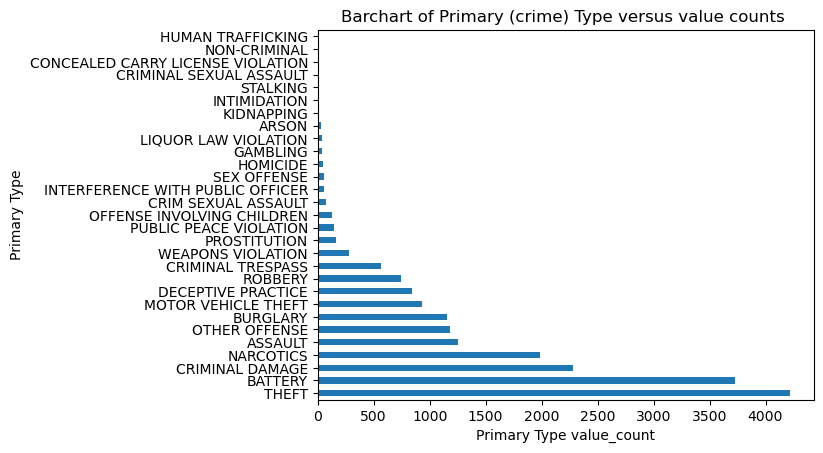

In [24]:
# A vertical barchart with 'Primary Type value_count' column on x-axis and 'Primary Type' on the y-axis
final_df['Primary Type'].value_counts().plot(kind='barh')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Primary Type value_count')
plt.ylabel('Primary Type')
plt.title('Barchart of Primary (crime) Type versus value counts ');

Observation:

Criminal trespass, robbery, deceptive practice, motor vehicle theft, burglary, other offence, assault, narcotics, criminal damage, battery and theft are the most frequent comitted crime (in ascending order)

A countplot of 'Primary Type' on y-axis and hue of the 'Violent Crime' to see the frequency of violent crime

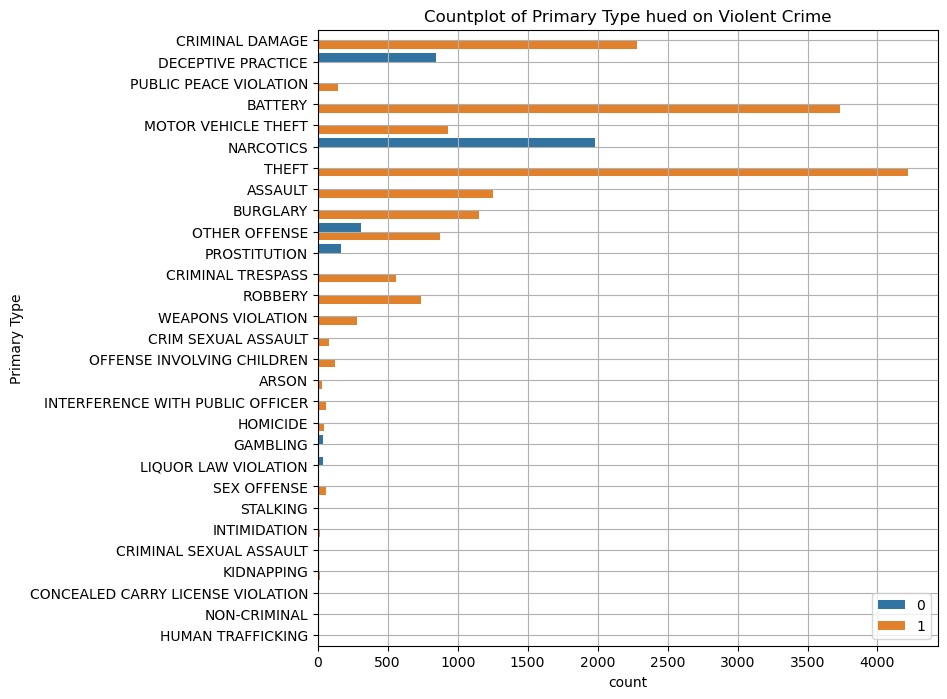

In [25]:
# Increase the size of the figure
plt.rcParams["figure.figsize"] = (8,8)

# the count plot
sns.countplot(y ='Primary Type', data = final_df, hue='Violent Crime');
plt.title('Countplot of Primary Type hued on Violent Crime')
plt.legend(loc='lower right');

plt.grid()

Observation: Most of the frequently committed crimes are in the category of violent crimes

A countplot of 'Primary Type' on y-axis and hue of the 'Domestic' column to see the frequency of Domestic crime

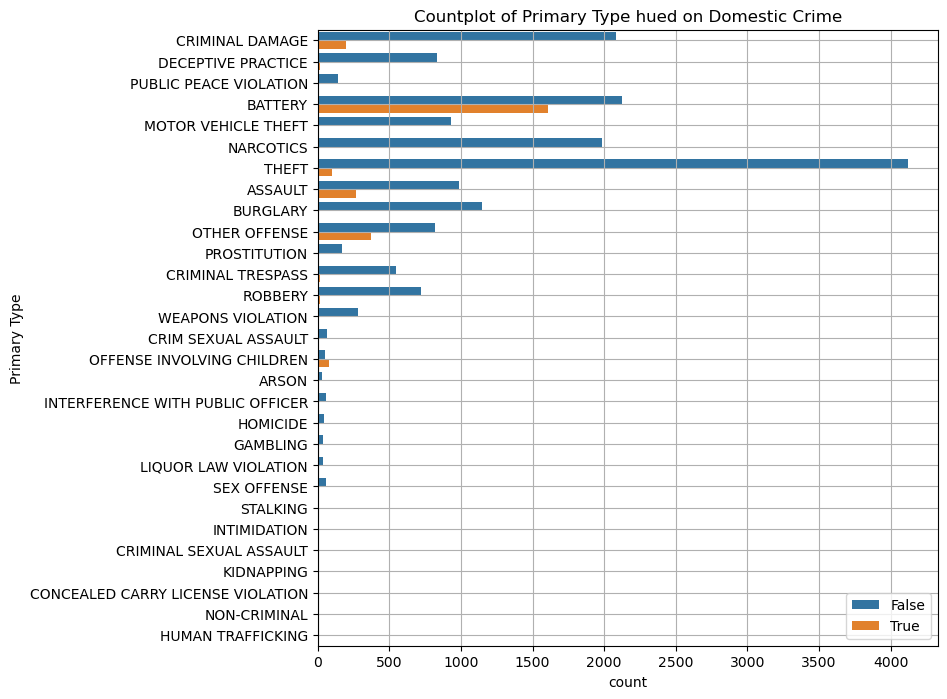

In [26]:
# Increase the size of the figure
plt.rcParams["figure.figsize"] = (8,8)

# the count plot
sns.countplot(y ='Primary Type', data = final_df, hue='Domestic');
plt.title('Countplot of Primary Type hued on Domestic Crime')

plt.legend(loc='lower right');
plt.grid()

In [27]:
final_df['Primary Type'].value_counts().sum()

20000

Observation: Just few of the most frequently commited crime are domestic crimes, and are about 2400 out of 20,000 crimes reported in our dataset

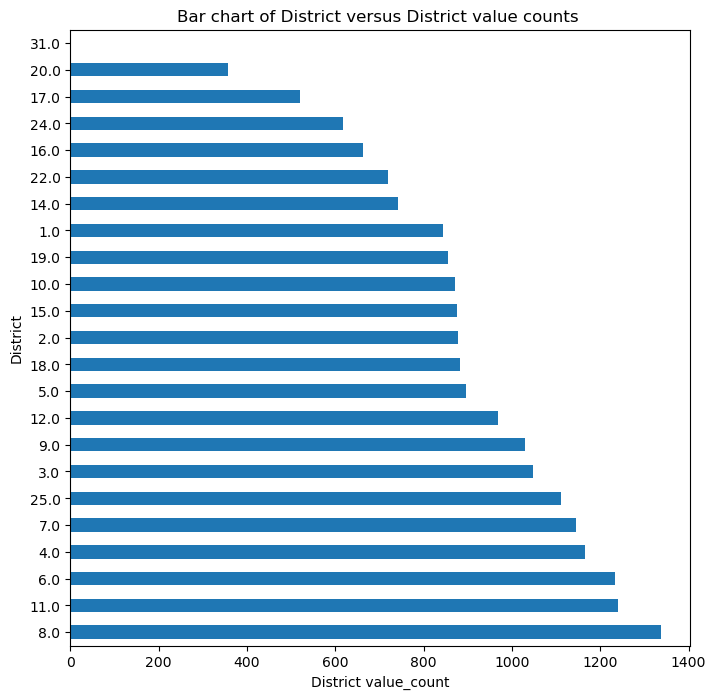

In [28]:
# A vertical barchart with 'Primary Type value_count' column on x-axis and 'Primary Type' on the y-axis
final_df['District'].value_counts().plot(kind='barh')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('District value_count')
plt.ylabel('District')
plt.title('Bar chart of District versus District value counts ');

Observation: Crimes are are almost evenly distributed in all the district, but with higher concentration in District 8, 11, 6, 4, 7, 25, and 3.

Observation: Crimes are are almost evenly distributed in all the district, but with higher concentration in District 8, 11, 25, 6 and 4, 7, 3, and 12.

In [29]:
final_df.columns

Index(['Block', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'District', 'Ward', 'Updated On', 'month', 'day',
       'period', 'dayType', 'Violent Crime'],
      dtype='object')

In [30]:
final_df['dayType'].nunique()

2

A countplot of 'Primary Type' on y-axis and hue of the 'dayType' column to see frequently commited crimes on weekend or weekdays

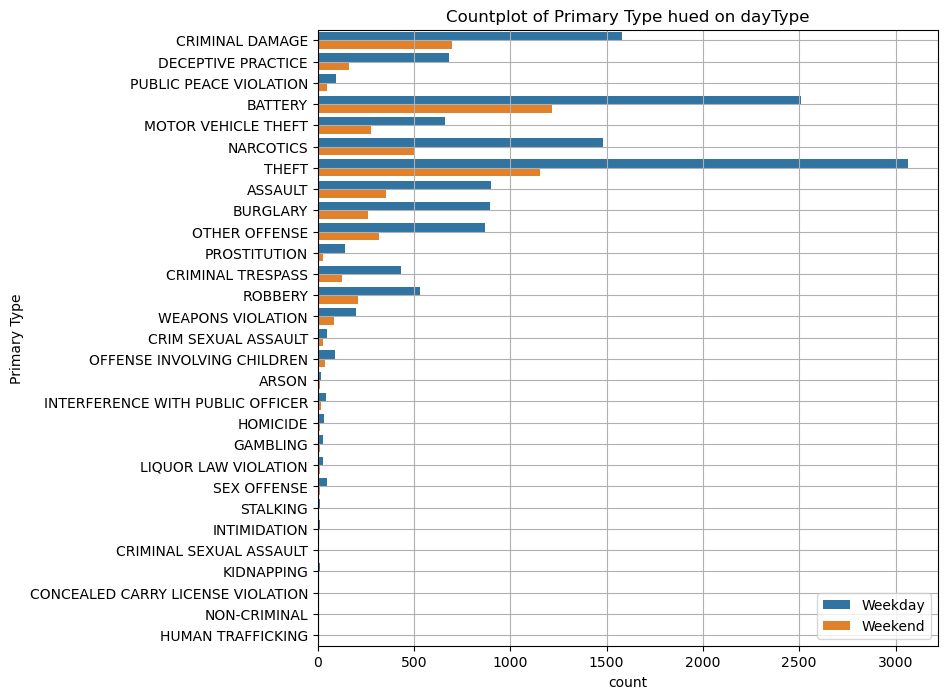

In [31]:
# Increase the size of the figure
plt.rcParams["figure.figsize"] = (8,8)

# the count plot
sns.countplot(y ='Primary Type', data = final_df, hue='dayType');
plt.title('Countplot of Primary Type hued on dayType')

plt.legend(loc='lower right');
plt.grid()

Observation: 

Most of the frequently commited crimes (especially the violent crimes) are committed during the weekdays.

A countplot of 'Primary Type' on y-axis and hue of the 'period' column to see period of day that crime is most frequently commited.

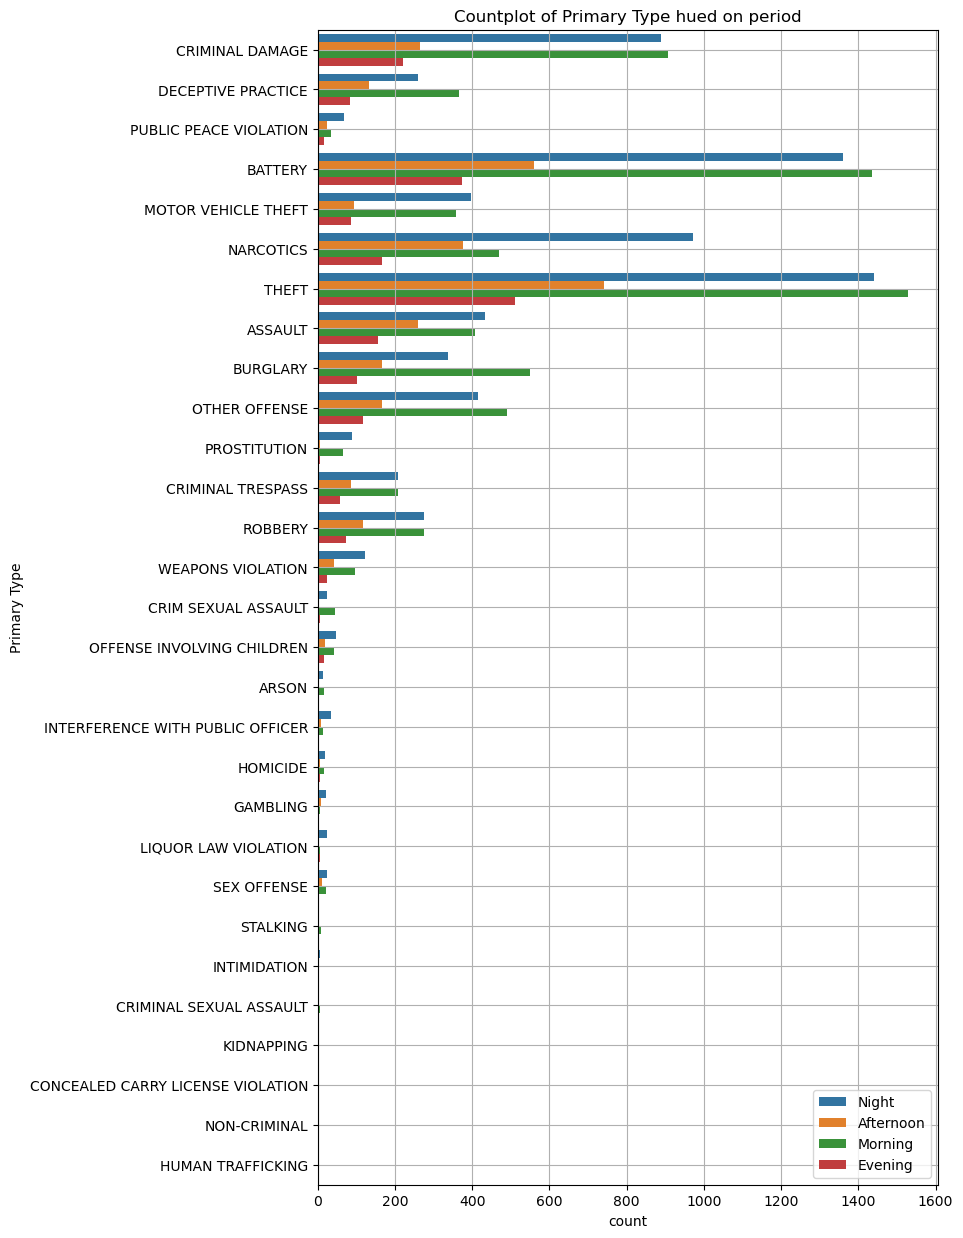

In [32]:
# Increase the size of the figure
plt.rcParams["figure.figsize"] = (8,15)

# the count plot
sns.countplot(y ='Primary Type', data = final_df, hue='period');
plt.title('Countplot of Primary Type hued on period')

plt.legend(loc='lower right');
plt.grid()

Observation: All the crimes are committed more often in the morning and at night than other time of the day.



# Further Feature Engineering

In [33]:
final_df.head()

,Block,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Updated On,month,day,period,dayType,Violent Crime
0,020XX W IRVING PARK RD,05/18/2012 10:45:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,19.0,47.0,02/04/2016 06:33:39 AM,May,Fri,Night,Weekday,1
1,029XX W AUGUSTA BLVD,06/03/2010 07:25:00 PM,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,TAXICAB,False,False,12.0,26.0,02/10/2018 03:50:01 PM,Jun,Thu,Night,Weekday,0
2,057XX N NAGLE AVE,10/26/2015 03:40:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,GAS STATION,True,False,16.0,41.0,02/10/2018 03:50:01 PM,Oct,Mon,Afternoon,Weekday,1
3,015XX N GREENVIEW AVE,07/11/2006 10:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,14.0,1.0,02/28/2018 03:56:25 PM,Jul,Tue,Night,Weekday,1
4,108XX S RACINE AVE,07/30/2004 04:40:00 AM,BATTERY,SIMPLE,STREET,False,False,22.0,34.0,02/10/2018 03:50:01 PM,Jul,Fri,Morning,Weekday,1


Check for high low cardinality categorical features

In [34]:
'''final_df.nunique()'''

'final_df.nunique()'

Reduce the high cadinality of 'Location Description' by merging the values with low value count to the value 
'OTHER'

In [35]:
'''# Check for values with low value count
final_df['Location Description'].value_counts().tail(70)'''

"# Check for values with low value count\nfinal_df['Location Description'].value_counts().tail(70)"

In [36]:
'''# Create a value count dataframe 
loc_desc_cardinality_df = final_df['Location Description'].value_counts().to_frame()
loc_desc_cardinality_df.head()'''

"# Create a value count dataframe \nloc_desc_cardinality_df = final_df['Location Description'].value_counts().to_frame()\nloc_desc_cardinality_df.head()"

In [37]:
'''# Select the index with value count above 26
loc_desc_card_red = loc_desc_cardinality_df[loc_desc_cardinality_df.iloc[:, 0] > 26].index
'''

'# Select the index with value count above 26\nloc_desc_card_red = loc_desc_cardinality_df[loc_desc_cardinality_df.iloc[:, 0] > 26].index\n'

In [38]:
'''len(loc_desc_card_red)'''

'len(loc_desc_card_red)'

In [39]:
'''# Assign replace all the values not in 'loc_desc_card_red' with 'OTHER.'
final_df["Location Description"] = final_df["Location Description"].apply(lambda c: c if c in loc_desc_card_red else "OTHER")
final_df["Location Description"].nunique()'''

'# Assign replace all the values not in \'loc_desc_card_red\' with \'OTHER.\'\nfinal_df["Location Description"] = final_df["Location Description"].apply(lambda c: c if c in loc_desc_card_red else "OTHER")\nfinal_df["Location Description"].nunique()'

In [40]:
'''final_df.head()'''

'final_df.head()'

In [41]:
'''final_df.nunique()'''

'final_df.nunique()'

Reduce the cadinality of Description column

In [42]:
'''# Check for values with low value count
final_df['Description'].value_counts().tail(230)'''

"# Check for values with low value count\nfinal_df['Description'].value_counts().tail(230)"

In [43]:
'''# Create a 'Description' value count Dataframe
desc_cardinality_df = final_df['Description'].value_counts().to_frame()
desc_cardinality_df.head()'''

"# Create a 'Description' value count Dataframe\ndesc_cardinality_df = final_df['Description'].value_counts().to_frame()\ndesc_cardinality_df.head()"

In [44]:
'''# Select the index with value count above 30
desc_card_red = desc_cardinality_df[desc_cardinality_df['Description'] > 30].index
len(desc_card_red)'''

"# Select the index with value count above 30\ndesc_card_red = desc_cardinality_df[desc_cardinality_df['Description'] > 30].index\nlen(desc_card_red)"

In [45]:
'''# Assign replace all the values not in 'loc_desc_card_red' with 'OTHER.'
final_df["Description"] = final_df["Description"].apply(lambda l: l if l in desc_card_red else "OTHER")
final_df["Description"].nunique()'''

'# Assign replace all the values not in \'loc_desc_card_red\' with \'OTHER.\'\nfinal_df["Description"] = final_df["Description"].apply(lambda l: l if l in desc_card_red else "OTHER")\nfinal_df["Description"].nunique()'

In [46]:
'''final_df['Description'].nunique()'''

"final_df['Description'].nunique()"

<AxesSubplot:title={'center':'Class Balance'}, xlabel='Class', ylabel='Relative Frequency'>

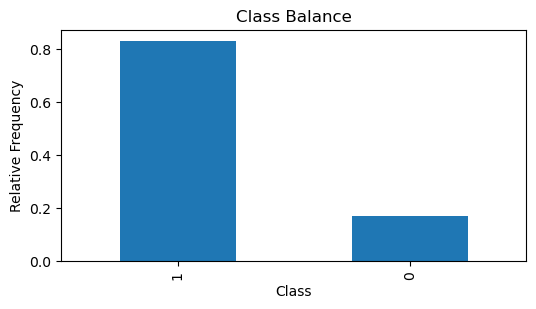

In [47]:
# Plot value counts of `"Violent Crime" to check for imbalanced data
plt.rcParams["figure.figsize"] = (6, 3)
final_df["Violent Crime"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
)

The values in 'Violent Crime' column is imbalanced. 

In [48]:
final_df.head()

,Block,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Updated On,month,day,period,dayType,Violent Crime
0,020XX W IRVING PARK RD,05/18/2012 10:45:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,19.0,47.0,02/04/2016 06:33:39 AM,May,Fri,Night,Weekday,1
1,029XX W AUGUSTA BLVD,06/03/2010 07:25:00 PM,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,TAXICAB,False,False,12.0,26.0,02/10/2018 03:50:01 PM,Jun,Thu,Night,Weekday,0
2,057XX N NAGLE AVE,10/26/2015 03:40:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,GAS STATION,True,False,16.0,41.0,02/10/2018 03:50:01 PM,Oct,Mon,Afternoon,Weekday,1
3,015XX N GREENVIEW AVE,07/11/2006 10:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,14.0,1.0,02/28/2018 03:56:25 PM,Jul,Tue,Night,Weekday,1
4,108XX S RACINE AVE,07/30/2004 04:40:00 AM,BATTERY,SIMPLE,STREET,False,False,22.0,34.0,02/10/2018 03:50:01 PM,Jul,Fri,Morning,Weekday,1


# Train-test split for Primary Type Prediction

In [49]:
# Split the dataset into feature and 'Primary Type' as target variables 
X1 = final_df[['Domestic', 'month', 'day', 'Description', 'Location Description', 'Arrest']]   
y_pri = final_df['Primary Type']

In [50]:
print('X1 shape: ', X1.shape)
print('y_pri shape: ', y_pri.shape)

X1 shape:  (20000, 6)
y_pri shape:  (20000,)


In [51]:
# Split the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train_pri, y_test_pri = train_test_split(X1, y_pri, test_size=0.4, random_state=20)

In [52]:
print('X_train1 shape: ', X_train1.shape)
print('y_train_pri shape: ', y_train_pri.shape)
print('X_test1 shape: ', X_test1.shape)
print('y_test_pri shape: ', y_test_pri.shape)

X_train1 shape:  (12000, 6)
y_train_pri shape:  (12000,)
X_test1 shape:  (8000, 6)
y_test_pri shape:  (8000,)


In [53]:
X_test1.head()

,Domestic,month,day,Description,Location Description,Arrest
9812,False,Mar,Sat,ATTEMPT THEFT,STREET,False
7615,False,Oct,Wed,CREDIT CARD FRAUD,RESIDENCE-GARAGE,False
14799,False,Nov,Tue,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False
16457,False,Jan,Thu,TO PROPERTY,RESIDENCE,False
6563,False,Jan,Fri,UNLAWFUL ENTRY,RESIDENCE,False


In [54]:
y_train_pri .head()

11672              THEFT
19560              THEFT
6653               THEFT
12776            BATTERY
18606    CRIMINAL DAMAGE
Name: Primary Type, dtype: object

In [55]:
'''from category_encoders import CountEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
# label encode 'Arrest' column
ordny = OrdinalEncoder()
y_trainp_ord = ordny.fit_transform(y_trainp)
y_testp_ord = ordny.transform(y_testp)
y_trainp_ord.head()'''

"from category_encoders import CountEncoder, OneHotEncoder, OrdinalEncoder\nfrom sklearn.preprocessing import LabelEncoder\n# label encode 'Arrest' column\nordny = OrdinalEncoder()\ny_trainp_ord = ordny.fit_transform(y_trainp)\ny_testp_ord = ordny.transform(y_testp)\ny_trainp_ord.head()"

In [56]:
'''# Oversampling using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=20)
X_train_over, y_train_over = over_sampler.fit_resample(X_train1_ord, y_trainp_ord)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()'''

'# Oversampling using RandomOverSampler\nfrom imblearn.over_sampling import RandomOverSampler\nover_sampler = RandomOverSampler(random_state=20)\nX_train_over, y_train_over = over_sampler.fit_resample(X_train1_ord, y_trainp_ord)\nprint("X_train_over shape:", X_train_over.shape)\nX_train_over.head()'

# Encode categorical variables

In [57]:
# Ordinal Encode the X_train and X_test
from category_encoders import CountEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
ordn1 = OrdinalEncoder(cols=['Domestic', 'month', 'day', 'Description', 'Location Description', 'Arrest'], return_df=True)
X_train1_ord = ordn1.fit_transform(X_train1)
X_test1_ord = ordn1.transform(X_test1)
X_train1_ord.head() 

,Domestic,month,day,Description,Location Description,Arrest
11672,1,1,1,1,1,1
19560,1,2,1,2,2,1
6653,1,3,2,3,3,1
12776,2,4,2,4,4,1
18606,2,5,3,5,4,1


In [58]:
# Encode the y_train and y_test 
ordn_y_pri = OrdinalEncoder(return_df=False)

y_train_pri_ord = ordn_y_pri.fit_transform(y_train_pri)
y_test_pri_ord = ordn_y_pri.transform(y_test_pri)
y_train_pri_ord

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [ 3],
       [ 1],
       [16]])

In [59]:
'''# Import encoders
from category_encoders import CountEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# label encode 'Domestic' column
lb = LabelEncoder()
X_train1['Domestic']= lb.fit_transform(X_train1['Domestic'])
X_test1['Domestic']= lb.transform(X_test1['Domestic'])
X_train1.head()'''

"# Import encoders\nfrom category_encoders import CountEncoder, OneHotEncoder, OrdinalEncoder\nfrom sklearn.preprocessing import LabelEncoder\n\n# label encode 'Domestic' column\nlb = LabelEncoder()\nX_train1['Domestic']= lb.fit_transform(X_train1['Domestic'])\nX_test1['Domestic']= lb.transform(X_test1['Domestic'])\nX_train1.head()"

In [60]:
'''# label encode 'Arrest' column
lbA = LabelEncoder()
X_train1['Arrest']= lbA.fit_transform(X_train1['Arrest'])
X_test1['Arrest']= lbA.transform(X_test1['Arrest'])
X_train1.head()'''

"# label encode 'Arrest' column\nlbA = LabelEncoder()\nX_train1['Arrest']= lbA.fit_transform(X_train1['Arrest'])\nX_test1['Arrest']= lbA.transform(X_test1['Arrest'])\nX_train1.head()"

In [61]:
'''# Count encode 'month' column

cat_features = ['month']
ce = CountEncoder(normalize=True)

X_train1['month'] = ce.fit_transform(X_train1[cat_features])
X_test1['month'] = ce.transform(X_test1[cat_features])
X_train1.head()'''

"# Count encode 'month' column\n\ncat_features = ['month']\nce = CountEncoder(normalize=True)\n\nX_train1['month'] = ce.fit_transform(X_train1[cat_features])\nX_test1['month'] = ce.transform(X_test1[cat_features])\nX_train1.head()"

In [62]:
'''# Count encode 'Description' column
cat_features_D = ['Description']
ced = CountEncoder(normalize=True)

X_train1['Description'] = ced.fit_transform(X_train1[cat_features_D])
X_test1['Description'] = ced.transform(X_test1[cat_features_D])
X_train1.head()'''

"# Count encode 'Description' column\ncat_features_D = ['Description']\nced = CountEncoder(normalize=True)\n\nX_train1['Description'] = ced.fit_transform(X_train1[cat_features_D])\nX_test1['Description'] = ced.transform(X_test1[cat_features_D])\nX_train1.head()"

In [63]:
'''# Count encode 'Location Description' column
cat_features_L = ['Location Description']
cel = CountEncoder(normalize=True)

X_train1['Location Description'] = cel.fit_transform(X_train1[cat_features_L])
X_test1['Location Description'] = cel.transform(X_test1[cat_features_L])
X_train1.head()'''

"# Count encode 'Location Description' column\ncat_features_L = ['Location Description']\ncel = CountEncoder(normalize=True)\n\nX_train1['Location Description'] = cel.fit_transform(X_train1[cat_features_L])\nX_test1['Location Description'] = cel.transform(X_test1[cat_features_L])\nX_train1.head()"

In [64]:
'''# OneHotEncode the day colum
ohe = OneHotEncoder(use_cat_names=True)
XT = ohe.fit_transform(X_train1['day'])
XTR = ohe.transform(X_test1['day'])
XT'''

"# OneHotEncode the day colum\nohe = OneHotEncoder(use_cat_names=True)\nXT = ohe.fit_transform(X_train1['day'])\nXTR = ohe.transform(X_test1['day'])\nXT"

In [65]:
'''# Concat X_train1 with XT without 'day' 'day_Teu' column
X_train1 = pd.concat([X_train1[['Domestic', 'month', 'Description', 'Location Description']], XT[['day_Wed ', 'day_Sun ', 'day_Sat ', 'day_Fri ', 'day_Mon ', 'day_Thu ']]], axis=1)
X_train1.head()'''

"# Concat X_train1 with XT without 'day' 'day_Teu' column\nX_train1 = pd.concat([X_train1[['Domestic', 'month', 'Description', 'Location Description']], XT[['day_Wed ', 'day_Sun ', 'day_Sat ', 'day_Fri ', 'day_Mon ', 'day_Thu ']]], axis=1)\nX_train1.head()"

In [66]:
'''# Concat X_test1 with XTR without 'day' 'day_Teu' column
X_test1 = pd.concat([X_test1[['Domestic', 'month', 'Description', 'Location Description']], XTR[['day_Wed ', 'day_Sun ', 'day_Sat ', 'day_Fri ', 'day_Mon ', 'day_Thu ']]], axis=1)
X_test1.head()'''

"# Concat X_test1 with XTR without 'day' 'day_Teu' column\nX_test1 = pd.concat([X_test1[['Domestic', 'month', 'Description', 'Location Description']], XTR[['day_Wed ', 'day_Sun ', 'day_Sat ', 'day_Fri ', 'day_Mon ', 'day_Thu ']]], axis=1)\nX_test1.head()"

Encode the test dataset

In [67]:
'''# label encode 'y_trainp' column
lb_pri = LabelEncoder()
y_trainplbover = lb_pri.fit_transform(y_train_pri)
y_testplbover = lb_pri.transform(y_test_pri)
y_trainplbover'''

"# label encode 'y_trainp' column\nlb_pri = LabelEncoder()\ny_trainplbover = lb_pri.fit_transform(y_train_pri)\ny_testplbover = lb_pri.transform(y_test_pri)\ny_trainplbover"

# Oversampling 

Balancing the imbalanced dataset

In [68]:
# Oversampling using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=20)
X_train_over1, y_train_pri_over = over_sampler.fit_resample(X_train1_ord, y_train_pri_ord)
print("X_train_over1 shape:", X_train_over1.shape)
X_train_over1.head()

X_train_over1 shape: (75603, 6)


,Domestic,month,day,Description,Location Description,Arrest
0,1,1,1,1,1,1
1,1,2,1,2,2,1
2,1,3,2,3,3,1
3,2,4,2,4,4,1
4,2,5,3,5,4,1


In [69]:
'''# Oversampling using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=20)
X_test_over1, y_test_pri_over = over_sampler.fit_resample(X_test1_ord, y_test_pri_ord)
print("X_test_over1 shape:", X_test_over1.shape)
X_test_over1.head()'''

'# Oversampling using RandomOverSampler\nfrom imblearn.over_sampling import RandomOverSampler\nover_sampler = RandomOverSampler(random_state=20)\nX_test_over1, y_test_pri_over = over_sampler.fit_resample(X_test1_ord, y_test_pri_ord)\nprint("X_test_over1 shape:", X_test_over1.shape)\nX_test_over1.head()'

# Model Building for Primary Type Prediction

Calculate the baseline

In [70]:
# create a dataframe from ytrainp 
ytrain_pri_df  = y_train_pri.to_frame()
ytrain_pri_df.head()

,Primary Type
11672,THEFT
19560,THEFT
6653,THEFT
12776,BATTERY
18606,CRIMINAL DAMAGE


In [73]:
# Calculate the maximum value count of 'Primary Type' to get the baseline
acc_baseline = ytrain_pri_df['Primary Type'].value_counts(normalize=True).max()
print("Baseline Accuracy for primary type prediction:", round(acc_baseline, 2))

Baseline Accuracy for primary type prediction: 0.22


Iteration phase

('LR', array([0.03161167, 0.01084584, 0.03663779, 0.        , 0.        ]), 0.0158, 0.0155)
('DTC', array([0.47986244, 0.97447259, 1.        , 1.        , 0.93439153]), 0.8777, 0.2004)
('RFC', array([0.47073606, 0.97817605, 1.        , 1.        , 0.93439153]), 0.8767, 0.2044)
('KNN', array([0.4237815 , 0.68434627, 0.42569936, 0.35072751, 0.13888889]), 0.4047, 0.1747)


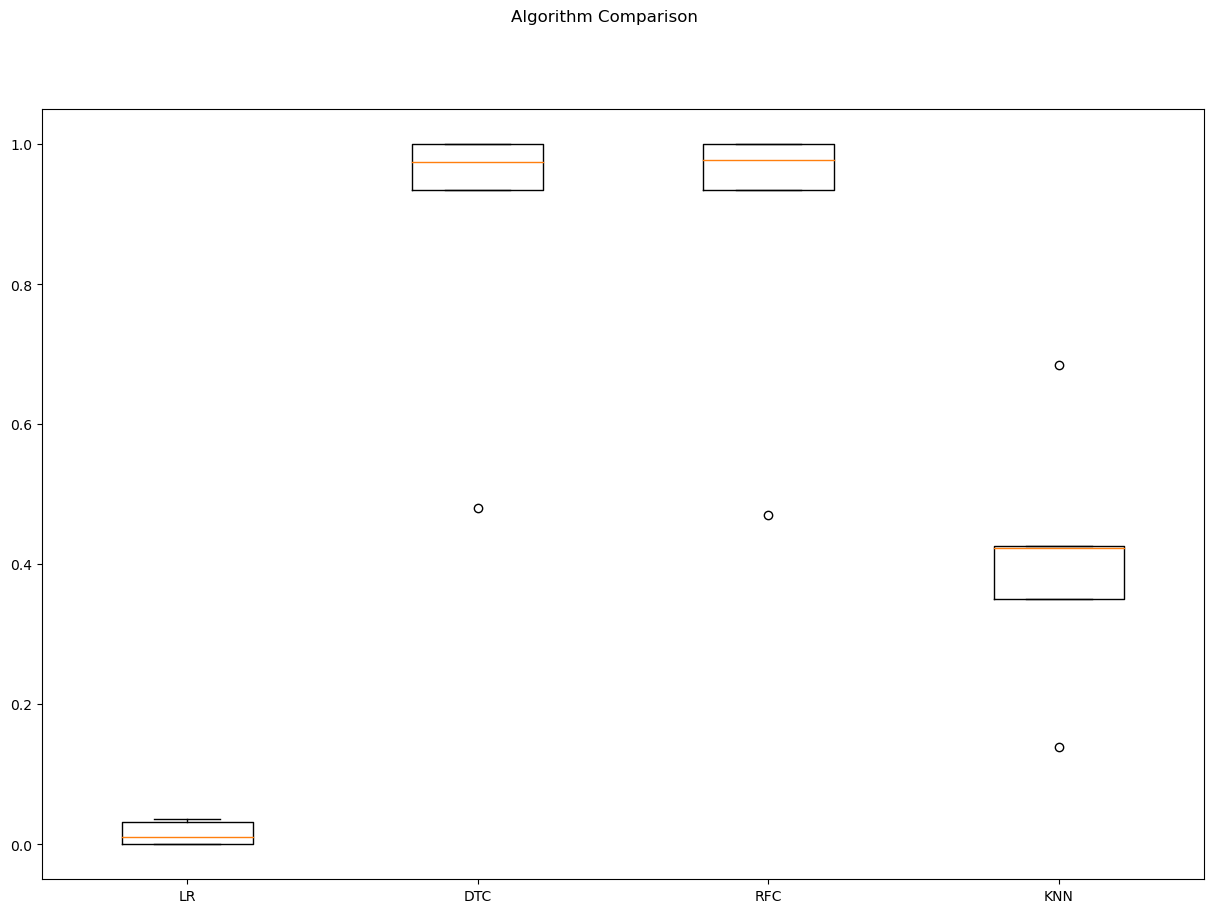

In [74]:
# Comparing Miltiple Algorithms  

# Compare algorithms with the comapare_multiple_alogorithm function
#comapare_multiple_alogorithm()

# Compare Algorithms


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier

 
X = X_train_over1  
Y = y_train_pri_over

#X = X_train1_ord 
#Y = y_train_pri_ord


numFolds = 5

models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('GRB', GradientBoostingClassifier()))


# evaluate each model in turn
results = []
names = []
acc_train = []
acc_test = []

scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=numFolds)#, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results, round(cv_results.mean(), 4), round(cv_results.std(), 4)) #round(cv_results.std(), 4)
          
    
#    acc_train = (model.score(X_train_over1, y_train_pri_over)) 
#    acc_test = (model.score(X_test_over1, y_test_pri_over))
    
    print(msg)
    
#    print("Training Accuracy:", round(acc_train, 4))
#    print("Validation Accuracy:", round(acc_test, 4))
    

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



In [75]:
# Instantiate DecisionTree Classifier
D_clf = DecisionTreeClassifier(random_state=42)

In [76]:
# Cross validation of DecisionTree Classifier
cv_acc_scores = cross_val_score(D_clf, X_train_over1, y_train_pri_over, cv=5, n_jobs=-1)
print("DC cross_val_score:", cv_acc_scores)

DC cross_val_score: [0.98842669 0.98849282 0.98955096 0.98981481 0.99345238]


In [77]:
D_params = {
    'max_depth': range(1, 31, 1),
    'min_samples_leaf': range(1, 11, 1),
    'criterion': ["gini", "entropy"]
}
D_params

{'max_depth': range(1, 31),
 'min_samples_leaf': range(1, 11),
 'criterion': ['gini', 'entropy']}

In [78]:
# Gridsearch CV for decisiontree classifier
from sklearn.model_selection import GridSearchCV
D_model = GridSearchCV(
    estimator = D_clf,
    param_grid=D_params,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring = "accuracy"
)
D_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'min_samples_leaf': range(1, 11)},
             scoring='accuracy', verbose=1)

In [79]:
'''D_clf.fit(X_train_over1, y_train_pri_over)'''

'D_clf.fit(X_train_over1, y_train_pri_over)'

In [80]:
'''tree_depth = D_clf.get_depth()
print("Tree Depth:", tree_depth)'''

'tree_depth = D_clf.get_depth()\nprint("Tree Depth:", tree_depth)'

In [81]:
# Train model
D_model.fit(X_train_over1, y_train_pri_over)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'min_samples_leaf': range(1, 11)},
             scoring='accuracy', verbose=1)

In [82]:
cv_results = pd.DataFrame(D_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069398,0.006343,0.015202,0.007441,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.068911,0.068977,0.068977,0.068915,0.068915,0.068939,0.000031,581
1,0.081599,0.032826,0.012608,0.004266,gini,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.068911,0.068977,0.068977,0.068915,0.068915,0.068939,0.000031,581
2,0.085391,0.016249,0.011998,0.001103,gini,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.068911,0.068977,0.068977,0.068915,0.068915,0.068939,0.000031,581
3,0.056196,0.007883,0.012001,0.000895,gini,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.068911,0.068977,0.068977,0.068915,0.068915,0.068939,0.000031,581
4,0.060999,0.014197,0.011999,0.001092,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.068911,0.068977,0.068977,0.068915,0.068915,0.068939,0.000031,581


In [83]:
# Extract best hyperparameters
D_model.best_params_

{'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 1}

In [84]:
acc_train = D_model.score(X_train_over1, y_train_pri_over)
acc_test = D_model.score(X_test1_ord, y_test_pri_ord)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9959
Test Accuracy: 0.9016


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#def evaluate_model(dt_classifier):
'''print("Train Accuracy :", accuracy_score(y_train_pri_over, D_model.predict(X_train_over1)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train_pri_over, D_model.predict(X_train_over1)))
print("-"*50)'''

# Make prediction and print confusion matrix
y_pri_pred = D_model.predict(X_test1_ord)
print("Test Accuracy :", accuracy_score(y_test_pri_ord, y_pri_pred))
print("Test Confusion Matrix:")
pri_conf_matrix = confusion_matrix(y_test_pri_ord, y_pri_pred)
print(pri_conf_matrix)

Test Accuracy : 0.901625
Test Confusion Matrix:
[[1606    0    0    1    0    0    0    1    1    0    3    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1142    0    1    0    1    0    2    3  321    1    5    0    5
     0    0    0    1    1    0    0    0    0    0    1    0    0    3]
 [   2    0  919    0   25    0    0    1    0    0    0    0    0    0
     0    1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  292    0    4    0    1    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    1    0    0    0    0]
 [   0    0    5    0  228    0    1    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0  381    0    0    1    1    0    0    0    0
     0    1    3    0    1    0    0    0    0    0    0    0    0    0]
 [   7    1    0    2    0    0  761    0    0    0    5    0    3    0
     1    

In [86]:
# Classification report for Primary Type perdiction
print(classification_report(y_test_pri_ord, y_pri_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98      1613
           2       0.83      0.77      0.80      1487
           3       0.99      0.97      0.98       948
           4       0.95      0.98      0.97       299
           5       0.90      0.97      0.93       235
           6       0.98      0.98      0.98       389
           7       0.99      0.97      0.98       785
           8       0.90      0.90      0.90       111
           9       0.98      0.92      0.95       359
          10       0.44      0.53      0.48       493
          11       0.96      0.95      0.95       481
          12       0.99      1.00      0.99       480
          13       0.79      0.94      0.86        16
          14       0.67      0.80      0.73        30
          15       0.86      0.65      0.74        55
          16       0.91      0.93      0.92        55
          17       0.43      0.75      0.55         4
          18       0.96    

In [87]:
'''# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Confusion matrix for train data')
ConfusionMatrixDisplay.from_estimator(D_model, X_train_over1, y_train_pri_over); 

'''

"# Plot confusion matrix\nfrom sklearn.metrics import ConfusionMatrixDisplay\nprint('Confusion matrix for train data')\nConfusionMatrixDisplay.from_estimator(D_model, X_train_over1, y_train_pri_over); \n\n"

In [88]:
'''from sklearn.metrics import ConfusionMatrixDisplay
#confusion_matrix = confusion_matrix(y_test_pri_ord, y_pri_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = pri_conf_matrix)

cm_display.plot()
plt.show()'''

'from sklearn.metrics import ConfusionMatrixDisplay\n#confusion_matrix = confusion_matrix(y_test_pri_ord, y_pri_pred)\n\ncm_display = ConfusionMatrixDisplay(confusion_matrix = pri_conf_matrix)\n\ncm_display.plot()\nplt.show()'

In [89]:
'''plt.rcParams["figure.figsize"] = (10, 15)
#ax = plt.subplot()
#sns.set(font_scale=0.5) # Adjust to fit
print('Confusion matrix for test data pridiction')
ConfusionMatrixDisplay.from_estimator(D_model, X_test1_ord, y_test_pri_ord, colorbar=False);'''

'plt.rcParams["figure.figsize"] = (10, 15)\n#ax = plt.subplot()\n#sns.set(font_scale=0.5) # Adjust to fit\nprint(\'Confusion matrix for test data pridiction\')\nConfusionMatrixDisplay.from_estimator(D_model, X_test1_ord, y_test_pri_ord, colorbar=False);'

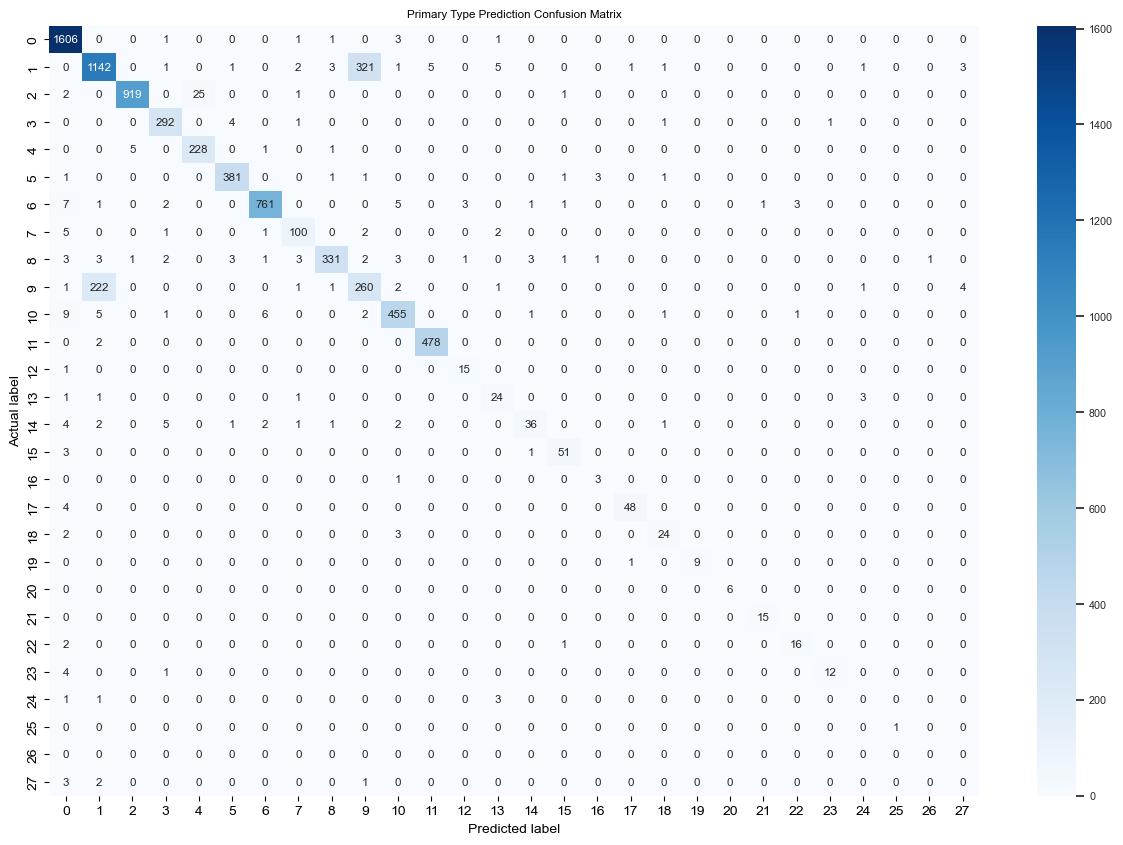

In [90]:
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.subplot()
sns.set(font_scale=0.7) # Adjust to fit
sns.heatmap(pri_conf_matrix, annot=True, ax=ax, fmt="g", cmap="Blues"
           )
plt.title('Primary Type Prediction Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [91]:
y_pri_pred.shape

(8000,)

# Communication Phase

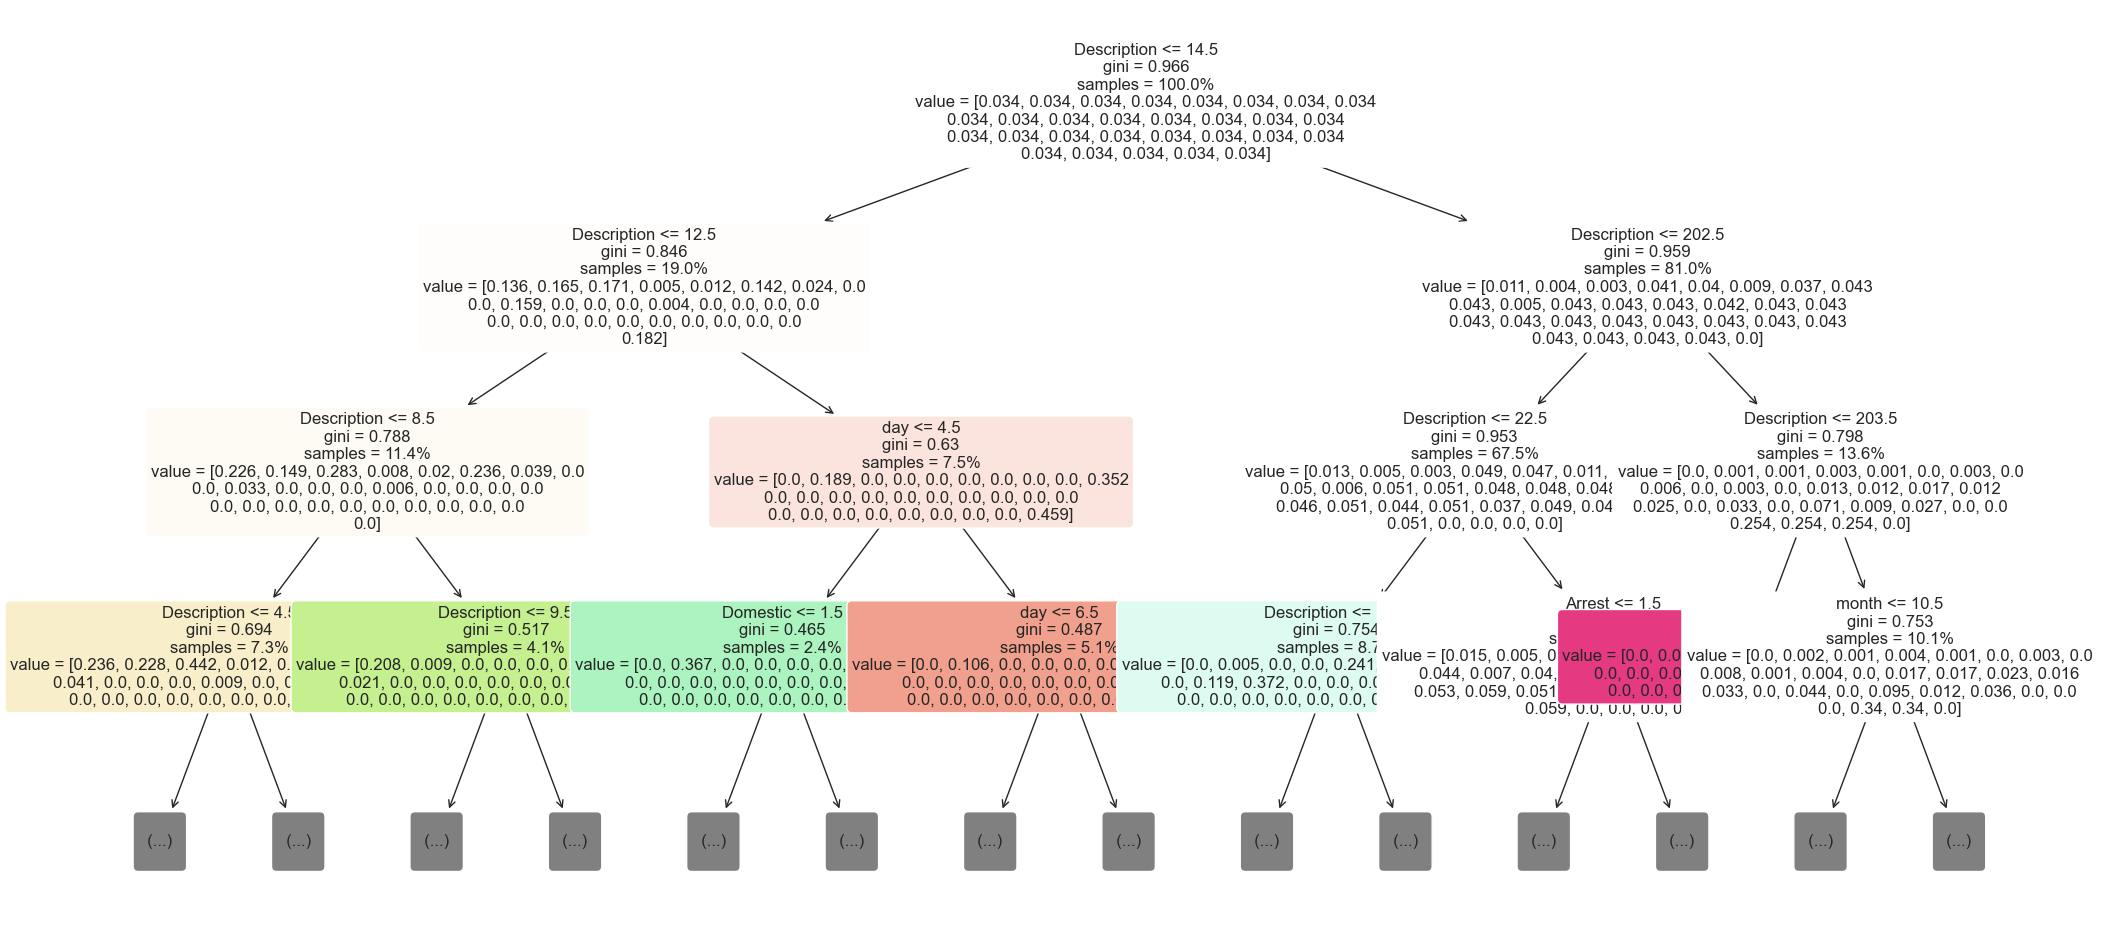

In [92]:
# Create larger figure
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=D_model.best_estimator_,
    feature_names=X_train_over1.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [93]:
features_pri = X_train_over1.columns
importances_pri = D_model.best_estimator_.feature_importances_
print("Features:", features_pri[:3])
print("Importances:", importances_pri[:3])

Features: Index(['Domestic', 'month', 'day'], dtype='object')
Importances: [0.00570441 0.07432462 0.04459188]


In [94]:
feat_imp_pri = pd.Series(importances_pri, index=features_pri).sort_values()
feat_imp_pri

Domestic                0.005704
Location Description    0.038446
day                     0.044592
Arrest                  0.052425
month                   0.074325
Description             0.784508
dtype: float64

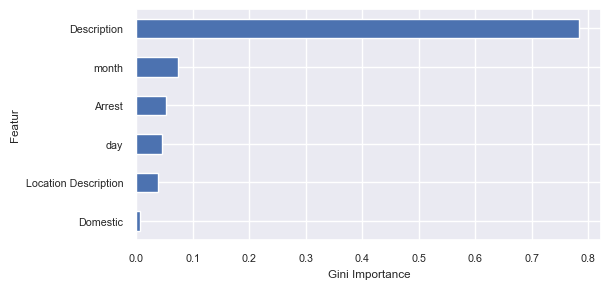

In [95]:
# Create horizontal bar chart of feature importance of Primary Type pediction+
plt.rcParams["figure.figsize"] = (6, 3)
feat_imp_pri.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Featur");

# Train-test split for Violent Crime Model

In [96]:
# Subset the violent crime target
y_v_crime = final_df['Violent Crime']
y_v_crime.shape

(20000,)

In [97]:
# Print the shape of X and Y
print('X1 shape: ', X1.shape)
print('y_v_crime shape: ', y_v_crime.shape)

X1 shape:  (20000, 6)
y_v_crime shape:  (20000,)


In [98]:
# Split the dataset into train and test data
X_train2, X_test2, y_train_v_crime, y_test_v_crime = train_test_split(X1, y_v_crime, test_size=0.4, random_state=20)
X_train2.head()

,Domestic,month,day,Description,Location Description,Arrest
11672,False,Dec,Wed,$500 AND UNDER,STREET,False
19560,False,Aug,Wed,FROM COIN-OP MACHINE/DEVICE,HOTEL/MOTEL,False
6653,False,Sep,Sun,RETAIL THEFT,SMALL RETAIL STORE,False
12776,True,Jun,Sun,DOMESTIC BATTERY SIMPLE,APARTMENT,False
18606,True,Oct,Sat,TO VEHICLE,APARTMENT,False


In [99]:
print('X_train2 shape: ', X_train2.shape)
print('y_train_v_crime shape: ', y_train_v_crime.shape)
print('X_test2 shape: ', X_test2.shape)
print('y_test_v_crime shape: ', y_test_v_crime.shape)

X_train2 shape:  (12000, 6)
y_train_v_crime shape:  (12000,)
X_test2 shape:  (8000, 6)
y_test_v_crime shape:  (8000,)


# Encode categorical variable for violent crime model

In [100]:
# Ordinal Encode the X_train and X_test
ordn2 = OrdinalEncoder(cols=['Domestic', 'month', 'day', 'Description', 'Location Description', 'Arrest'], return_df=True)
X_train2_ord = ordn2.fit_transform(X_train2)
X_test2_ord = ordn2.transform(X_test2) 
X_train2_ord.head() 

,Domestic,month,day,Description,Location Description,Arrest
11672,1,1,1,1,1,1
19560,1,2,1,2,2,1
6653,1,3,2,3,3,1
12776,2,4,2,4,4,1
18606,2,5,3,5,4,1


In [101]:
'''# Encode the y_train and y_test 
y_v_crime_ordn = OrdinalEncoder(return_df=False)

y_train_v_crime_ord = y_v_crime_ordn.fit_transform(y_train_v_crime)
y_test_v_crime_ord = y_v_crime_ordn.transform(y_test_v_crime)
y_train_v_crime_ord'''

'# Encode the y_train and y_test \ny_v_crime_ordn = OrdinalEncoder(return_df=False)\n\ny_train_v_crime_ord = y_v_crime_ordn.fit_transform(y_train_v_crime)\ny_test_v_crime_ord = y_v_crime_ordn.transform(y_test_v_crime)\ny_train_v_crime_ord'

# Over sampling of training data for violent crime prediction

In [102]:
# Oversampling using RandomOverSampler
over_sampler_v_crime = RandomOverSampler(random_state=20)
X_train_over2, y_train_v_crime_over = over_sampler_v_crime.fit_resample(X_train2_ord, y_train_v_crime)
print("X_train_over2 shape:", X_train_over2.shape)
print("y_train_v_crime_over shape:", y_train_v_crime_over.shape)
X_train_over2.head()

X_train_over2 shape: (19930, 6)
y_train_v_crime_over shape: (19930,)


,Domestic,month,day,Description,Location Description,Arrest
0,1,1,1,1,1,1
1,1,2,1,2,2,1
2,1,3,2,3,3,1
3,2,4,2,4,4,1
4,2,5,3,5,4,1


Baseline

In [103]:
# Calculate the maximum value count of 'violent crime' to get the baseline
acc_baseline_v_crime = y_train_v_crime.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline_v_crime, 2))

Baseline Accuracy: 0.83


# Model Building for Violent Crime Prediction

('LR', array([0.80757652, 0.80105369, 0.81284496, 0.75363773, 0.75715003]), 0.7865, 0.0257)
('DTC', array([0.98921224, 0.98795785, 0.99247366, 0.99974912, 1.        ]), 0.9939, 0.0051)
('RFC', array([0.96537883, 0.96437531, 0.96813848, 0.99949824, 1.        ]), 0.9795, 0.0166)
('KNN', array([0.90667336, 0.90642248, 0.90893126, 0.95709985, 0.95559458]), 0.9269, 0.024)
('GRB', array([0.95584546, 0.94681385, 0.94631209, 0.96312092, 0.96588058]), 0.9556, 0.0081)


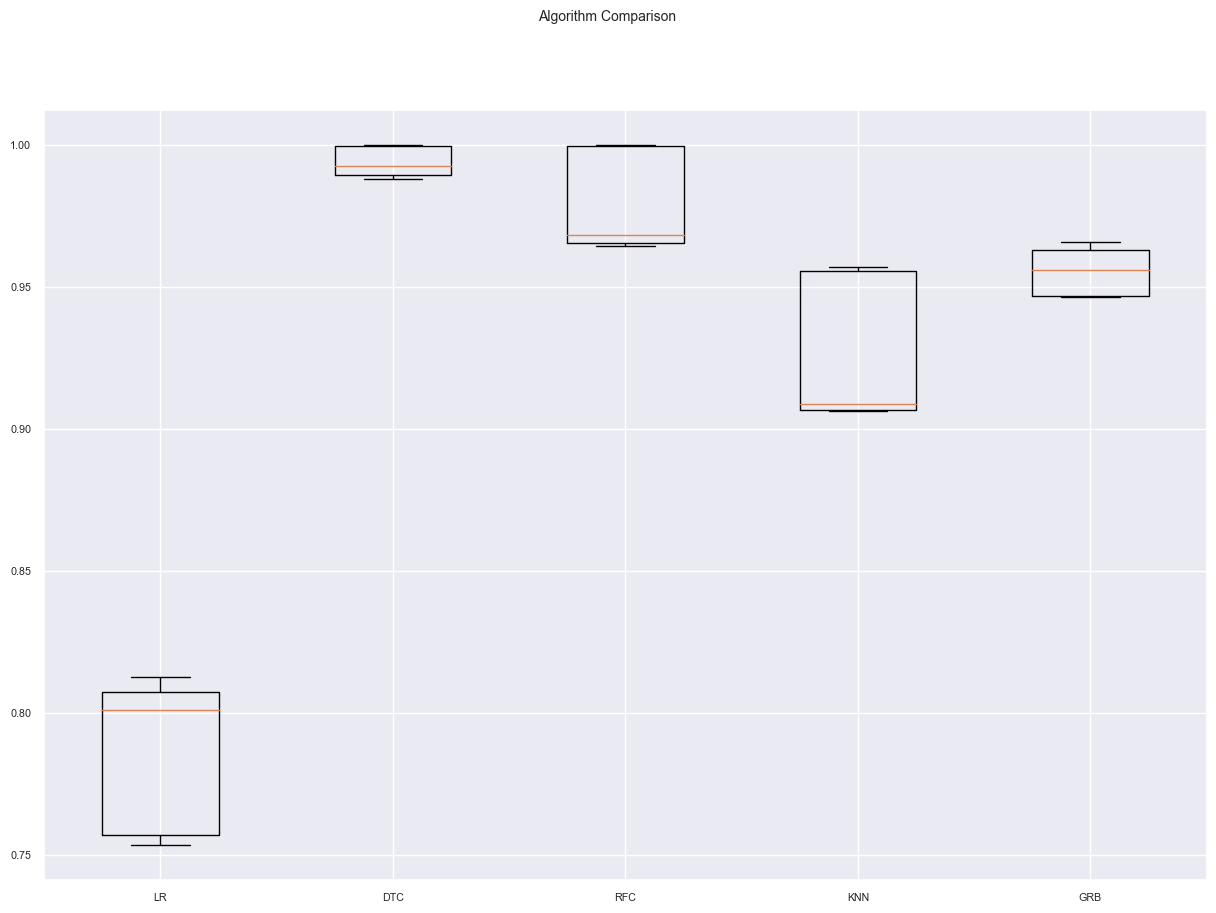

In [104]:
# Comparing Miltiple Algorithms  

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

 
X = X_train_over2 
Y = y_train_v_crime_over

#X = X_train1_ord 
#Y = y_train_pri_ord


numFolds = 5

models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GRB', GradientBoostingClassifier()))


# evaluate each model in turn
results = []
names = []
acc_train = []
acc_test = []

scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=numFolds)#, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results, round(cv_results.mean(), 4), round(cv_results.std(), 4)) #round(cv_results.std(), 4)
          
    
#    acc_train = (model.score(X_train_over1, y_train_pri_over)) 
#    acc_test = (model.score(X_test_over1, y_test_pri_over))
    
    print(msg)
    
#    print("Training Accuracy:", round(acc_train, 4))
#    print("Validation Accuracy:", round(acc_test, 4))
    

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



In [105]:
# Instantiate DecisionTree Classifier
v_crime_D_clf = DecisionTreeClassifier(random_state=42)

Get the longest depth for the purpose of hyperparameter tunning

In [106]:
'''# fit the model
v_crime_D_clf.fit(X_train_over2, y_train_v_crime_over) '''

'# fit the model\nv_crime_D_clf.fit(X_train_over2, y_train_v_crime_over) '

In [107]:
'''v_crime_tree_depth = v_crime_D_clf.get_depth()
print("Tree Depth:", v_crime_tree_depth)'''

'v_crime_tree_depth = v_crime_D_clf.get_depth()\nprint("Tree Depth:", v_crime_tree_depth)'

In [108]:
# Cross validation of DecisionTree Classifier
v_crime_cv_acc_scores = cross_val_score(v_crime_D_clf, X_train_over2, y_train_v_crime_over, cv=5, n_jobs=-1)
print("DC cross_val_score:", v_crime_cv_acc_scores)

DC cross_val_score: [0.99372805 0.99473156 0.99623683 0.99573507 0.99222278]


In [109]:
v_crime_D_params = {
    'max_depth': range(15, 40, 1),
    'min_samples_leaf': range(1, 11, 1),
    'criterion': ["gini", "entropy"]
}
v_crime_D_params

{'max_depth': range(15, 40),
 'min_samples_leaf': range(1, 11),
 'criterion': ['gini', 'entropy']}

In [110]:
# Gridsearch CV for decisiontree classifier
v_crime_D_model = GridSearchCV(
    estimator = v_crime_D_clf,
    param_grid=v_crime_D_params,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring = "accuracy"
)
v_crime_D_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(15, 40),
                         'min_samples_leaf': range(1, 11)},
             scoring='accuracy', verbose=1)

In [111]:
v_crime_D_model.fit(X_train_over2, y_train_v_crime_over)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(15, 40),
                         'min_samples_leaf': range(1, 11)},
             scoring='accuracy', verbose=1)

In [112]:
v_crime_cv_results = pd.DataFrame(v_crime_D_model.cv_results_).sort_values('rank_test_score')
v_crime_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
480,0.040623,0.007657,0.009376,0.007655,entropy,38,1,"{'criterion': 'entropy', 'max_depth': 38, 'min...",0.996237,0.994481,0.995233,0.995986,0.994982,0.995384,0.000646,1
470,0.046875,0.009882,0.003125,0.006251,entropy,37,1,"{'criterion': 'entropy', 'max_depth': 37, 'min...",0.996237,0.994481,0.995233,0.995986,0.994982,0.995384,0.000646,1
450,0.054609,0.006992,0.006398,0.004802,entropy,35,1,"{'criterion': 'entropy', 'max_depth': 35, 'min...",0.996237,0.994481,0.995233,0.995986,0.994982,0.995384,0.000646,1
440,0.058599,0.010765,0.010603,0.013199,entropy,34,1,"{'criterion': 'entropy', 'max_depth': 34, 'min...",0.996237,0.994481,0.995233,0.995986,0.994982,0.995384,0.000646,1
410,0.054997,0.008247,0.005802,0.002229,entropy,31,1,"{'criterion': 'entropy', 'max_depth': 31, 'min...",0.996237,0.994481,0.995233,0.995986,0.994982,0.995384,0.000646,1


In [113]:
# Extract best hyperparameters
v_crime_D_model.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1}

In [114]:
# Calculate the score of both train and test data to confirm if the model can generalize
v_crune_acc_train = v_crime_D_model.score(X_train_over2, y_train_v_crime_over)
v_crime_acc_test = v_crime_D_model.score(X_test2_ord, y_test_v_crime)

print("Training Accuracy:", round(v_crune_acc_train, 4))
print("Test Accuracy:", round(v_crime_acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9888


In [115]:
# Make prediction and print confusion matrix
y_v_crime_pred = v_crime_D_model.predict(X_test2_ord)
print("Test Accuracy :", accuracy_score(y_test_v_crime, y_v_crime_pred))
print("Test Confusion Matrix:")
v_crime_conf_matrix = confusion_matrix(y_test_v_crime, y_v_crime_pred)
print(v_crime_conf_matrix)

Test Accuracy : 0.98875
Test Confusion Matrix:
[[1289   61]
 [  29 6621]]


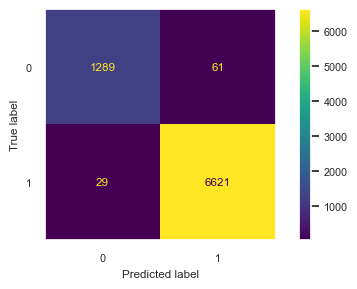

In [116]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = (6, 3)
ConfusionMatrixDisplay.from_estimator(v_crime_D_model, X_test2_ord, y_test_v_crime);
plt.grid(False)

In [117]:
# Classification report for Primary Type perdiction
print(classification_report(y_test_v_crime, y_v_crime_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1350
           1       0.99      1.00      0.99      6650

    accuracy                           0.99      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.99      0.99      0.99      8000



In [118]:
y_v_crime_pred.shape

(8000,)

# Communication Phase for violent crime prediction

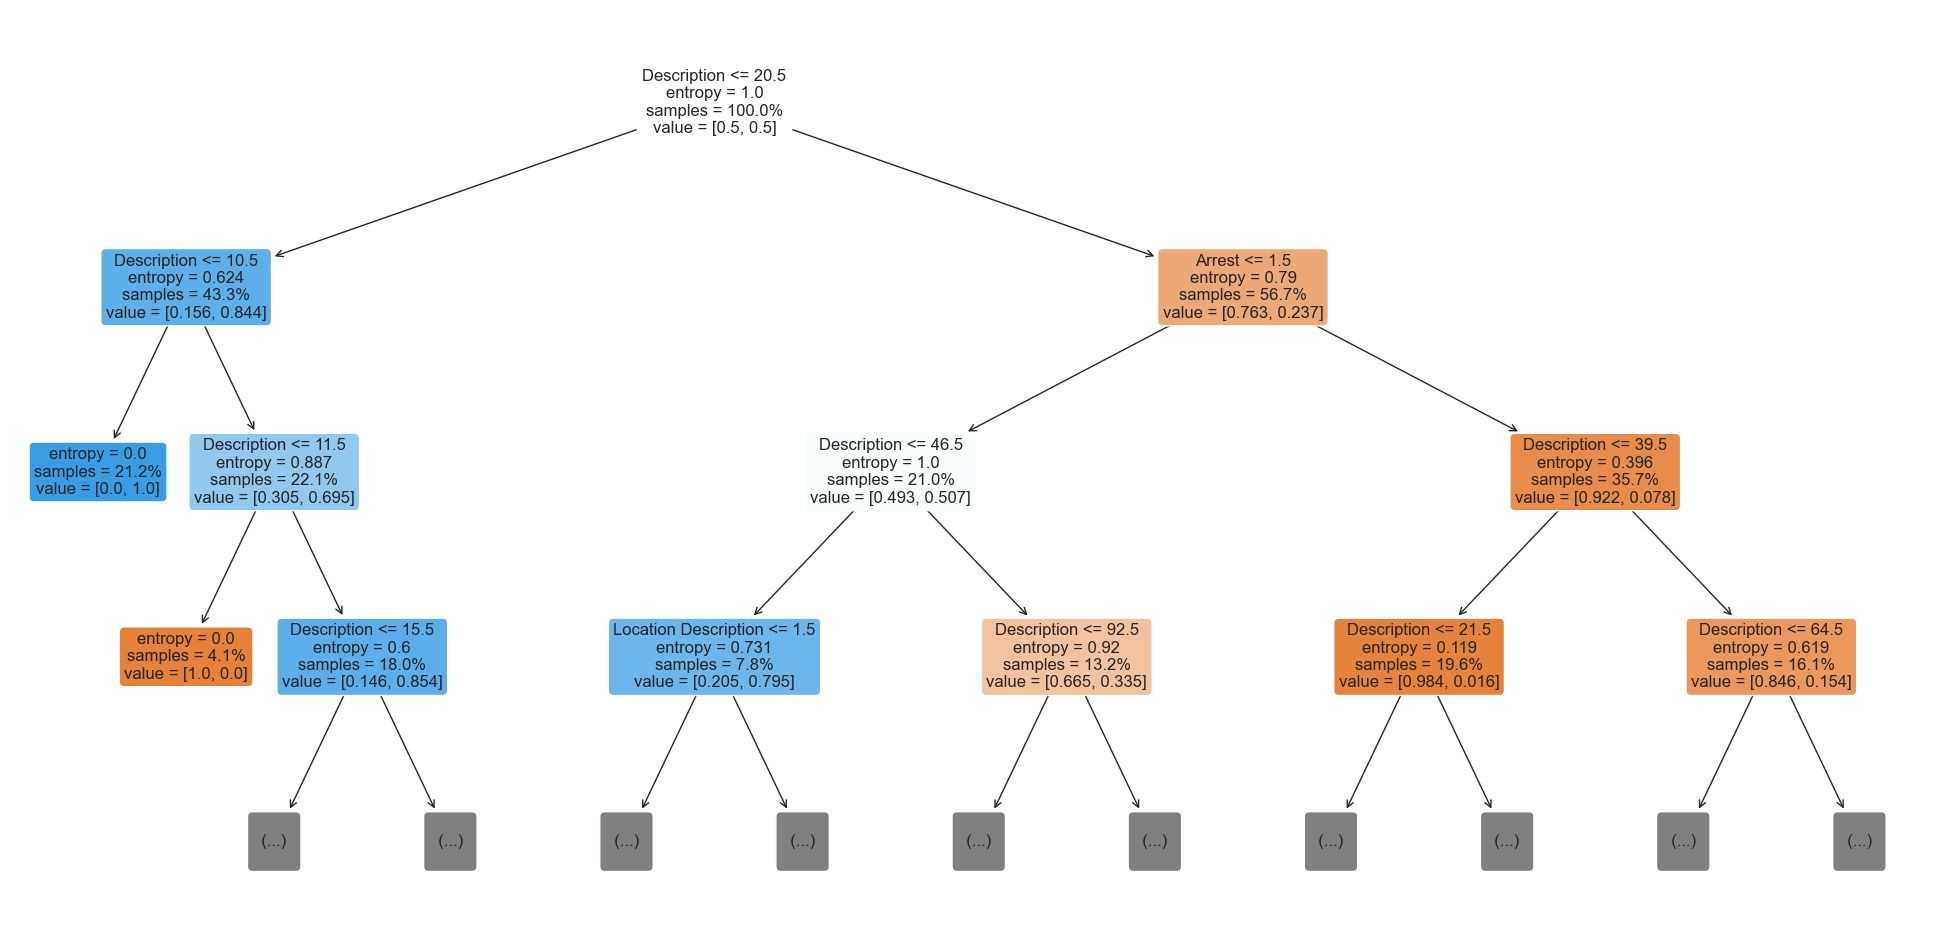

In [119]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=v_crime_D_model.best_estimator_,
    feature_names=X_train_over2.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [120]:
# Obtain the feature importances
features_v_crime = X_train_over2.columns
importances_v_crime = v_crime_D_model.best_estimator_.feature_importances_
print("Features:", features_v_crime[:3])
print("Importances:", importances_v_crime[:3])

Features: Index(['Domestic', 'month', 'day'], dtype='object')
Importances: [0.00429611 0.00919265 0.00497733]


In [121]:
# Convert feature importances to dataframe
feat_imp_v_crime = pd.Series(importances_v_crime, index=features_v_crime).sort_values()
feat_imp_v_crime

Domestic                0.004296
day                     0.004977
month                   0.009193
Location Description    0.021021
Arrest                  0.096639
Description             0.863874
dtype: float64

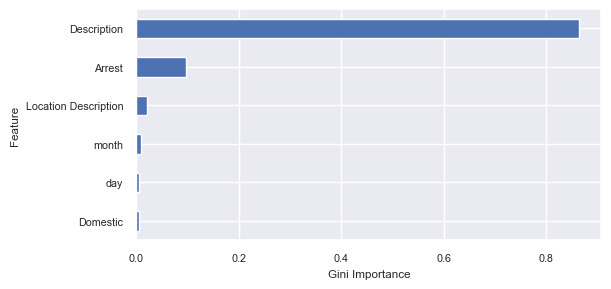

In [122]:
# Create horizontal bar chart of feature importance of violent crime pediction+
feat_imp_v_crime.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

# Split the Train and Test data for 'period' model

In [185]:
df_sample.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'month', 'day', 'period', 'dayType',
       'Violent Crime'],
      dtype='object')

# RFECV

In [206]:
# Split the 'final_df' dataset into X3 features and 'period' as target variables 
X3 = df_sample.drop(columns=['Unnamed: 0', 'period'])
#X3 = final_df[['Domestic', 'month', 'day', 'Description', 'Location Description', 'Arrest']]   
y_period = df_sample['period']

print('X3 shape: ', X3.shape)                           
print('y_period shape: ', y_period.shape)

X3 shape:  (20000, 26)
y_period shape:  (20000,)


In [207]:
# Split the dataset into train and test data
X_train3, X_test3, y_train_period, y_test_period = train_test_split(X3, y_period, test_size=0.4, random_state=20)

print('X_train3 shape: ', X_train3.shape)
print('y_train_period shape: ', y_train_period.shape)
print('X_test3 shape: ', X_test3.shape)
print('y_test_period shape: ', y_test_period.shape)

X_train3 shape:  (12000, 26)
y_train_period shape:  (12000,)
X_test3 shape:  (8000, 26)
y_test_period shape:  (8000,)


In [209]:
# Add the primary type prediction and the violent crime prediction to the X_test3 dataset
Dict_pred = {'Primary Type_Predicted': y_pri_pred, 'violent crime_predicted': y_v_crime_pred}
X_test3[['Primary Type_Predicted', 'violent crime_predicted']] = pd.DataFrame(Dict_pred, index=X_test3.index)
X_test3.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,month,day,dayType,Violent Crime,Primary Type_Predicted,violent crime_predicted
9812,11632197,JC196522,03/23/2019 11:40:00 AM,037XX W LAWRENCE AVE,0850,THEFT,ATTEMPT THEFT,STREET,False,False,...,03/30/2019 04:05:30 PM,41.968306,-87.722294,"(41.968305606, -87.722294037)",Mar,Sat,Weekend,1,1,1
7615,8867893,HV541734,10/31/2012 06:10:00 AM,052XX N NEWCASTLE AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESIDENCE-GARAGE,False,False,...,02/10/2018 03:50:01 PM,41.976168,-87.797558,"(41.976167726, -87.797558439)",Oct,Wed,Weekday,0,9,0
14799,10754246,HZ516786,11/15/2016 06:25:00 PM,012XX N BOSWORTH AVE,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,02/10/2018 03:50:01 PM,41.903965,-87.666182,"(41.903965128, -87.666182338)",Nov,Tue,Weekday,1,1,1
16457,10814532,JA114021,01/12/2017 01:00:00 PM,078XX S SOUTH SHORE DR,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,02/10/2018 03:50:01 PM,41.754210,-87.550433,"(41.754209909, -87.550433015)",Jan,Thu,Weekday,1,3,1
6563,7310551,HS113419,01/08/2010 09:00:00 AM,060XX S NATOMA AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,02/10/2018 03:50:01 PM,41.782511,-87.787554,"(41.782510849, -87.787554427)",Jan,Fri,Weekday,1,12,1


In [210]:
# Split the X_test3 and y_test_period into another train and test data
X_train3_with_pred, X_test3_with_pred, y_train_period1, y_test_period1 = train_test_split(X_test3, y_test_period, test_size=0.4, random_state=40)

print('X_train3_with_pred shape: ', X_train3_with_pred.shape)
print('y_train_period1 shape: ', y_train_period1.shape)
print('X_test3_with_pred shape: ', X_test3_with_pred.shape)
print('y_test_period1 shape: ', y_test_period1.shape)

X_train3_with_pred shape:  (4800, 28)
y_train_period1 shape:  (4800,)
X_test3_with_pred shape:  (3200, 28)
y_test_period1 shape:  (3200,)


In [211]:
# Ordinal Encode the X_train and X_test
ordn3 = OrdinalEncoder(
    #cols=['Domestic', 'month', 'day', 'Description', 'Location Description', 'Arrest'], 
    return_df=True)
X_train3_ord = ordn3.fit_transform(X_train3_with_pred) 
X_test3_ord = ordn3.transform(X_test3_with_pred) 
X_train3_ord.head() 

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,month,day,dayType,Violent Crime,Primary Type_Predicted,violent crime_predicted
19333,3317064,1,1,1,1,1,1,1,True,False,...,1,41.807578,-87.615550,1,1,1,1,0,7,0
8266,11732843,2,2,2,2,2,2,2,False,False,...,2,41.830954,-87.630703,2,2,2,2,1,9,0
8210,4081048,3,3,3,3,3,3,3,False,False,...,1,41.910765,-87.658121,3,2,3,1,1,10,1
5255,4408073,4,4,4,4,4,4,1,True,False,...,1,41.746108,-87.658475,4,3,4,2,1,16,1
11408,2658271,5,5,5,5,2,3,4,False,False,...,1,41.736052,-87.614515,5,4,4,2,1,2,1


In [212]:
# Ordinal Encode y_train_period1 and y_test_period1 
ordn_y_period = OrdinalEncoder(return_df=False)  

y_train_period1_ord = ordn_y_period.fit_transform(y_train_period1) 
y_test_period1_ord = ordn_y_period.transform(y_test_period1)
y_train_period1_ord                                  

array([[1],
       [2],
       [1],
       ...,
       [4],
       [1],
       [1]])

In [213]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
rfecv = RFECV(estimator=dtree, step=1, scoring="neg_mean_squared_error", cv=4, verbose=1,
                  n_jobs = 4)
rfecv.fit(X_train3_ord, y_train_period1_ord)

rfecv.transform(X_train3_ord)

print(rfecv)
print(rfecv.n_features_)

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
RFECV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=4,
      scoring='neg_mean_squared_error', verbose=1)
21


In [214]:
print(np.where(rfecv.support_ == False)[0])

[ 8  9 11 14 24 25 27]


In [215]:
print(np.where(rfecv.support_ == True)[0])

[ 0  1  2  3  4  5  6  7 10 12 13 15 16 17 18 19 20 21 22 23 26]


In [218]:
X_train3_ord.iloc[:, [8,  9, 11, 14, 24, 25, 27]].head()

,Arrest,Domestic,District,FBI Code,dayType,Violent Crime,violent crime_predicted
19333,True,False,2.0,1,1,0,0
8266,False,False,9.0,2,2,1,0
8210,False,False,14.0,3,1,1,1
5255,True,False,6.0,4,2,1,1
11408,False,False,6.0,5,2,1,1


First of all train-test split the dataset with same parameters as the previous train-test split in order to obtain dataset of thesame shape and same values before adding the predicted values.

In [124]:
# Split the dataset into train and test data
X_train3, X_test3, y_train_period, y_test_period = train_test_split(X3, y_period, test_size=0.4, random_state=20)

print('X_train3 shape: ', X_train3.shape)
print('y_train_period shape: ', y_train_period.shape)
print('X_test3 shape: ', X_test3.shape)
print('y_test_period shape: ', y_test_period.shape)

X_train3 shape:  (12000, 6)
y_train_period shape:  (12000,)
X_test3 shape:  (8000, 6)
y_test_period shape:  (8000,)


In [125]:
X_test3.head()

,Domestic,month,day,Description,Location Description,Arrest
9812,False,Mar,Sat,ATTEMPT THEFT,STREET,False
7615,False,Oct,Wed,CREDIT CARD FRAUD,RESIDENCE-GARAGE,False
14799,False,Nov,Tue,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False
16457,False,Jan,Thu,TO PROPERTY,RESIDENCE,False
6563,False,Jan,Fri,UNLAWFUL ENTRY,RESIDENCE,False


In [126]:
# Add the primary type prediction and the violent crime prediction to the X_test3 dataset
Dict_pred = {'Primary Type_Predicted': y_pri_pred, 'violent crime_predicted': y_v_crime_pred}
X_test3[['Primary Type_Predicted', 'violent crime_predicted']] = pd.DataFrame(Dict_pred, index=X_test3.index)
X_test3.head()

,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted
9812,False,Mar,Sat,ATTEMPT THEFT,STREET,False,1,1
7615,False,Oct,Wed,CREDIT CARD FRAUD,RESIDENCE-GARAGE,False,9,0
14799,False,Nov,Tue,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,1,1
16457,False,Jan,Thu,TO PROPERTY,RESIDENCE,False,3,1
6563,False,Jan,Fri,UNLAWFUL ENTRY,RESIDENCE,False,12,1


Finally, Split the X_test3 and y_test_period into another train and test dataset

In [127]:
# Split the X_test3 and y_test_period into another train and test data
X_train3_with_pred, X_test3_with_pred, y_train_period1, y_test_period1 = train_test_split(X_test3, y_test_period, test_size=0.4, random_state=20)

print('X_train3_with_pred shape: ', X_train3_with_pred.shape)
print('y_train_period1 shape: ', y_train_period1.shape)
print('X_test3_with_pred shape: ', X_test3_with_pred.shape)
print('y_test_period1 shape: ', y_test_period1.shape)

X_train3_with_pred shape:  (4800, 8)
y_train_period1 shape:  (4800,)
X_test3_with_pred shape:  (3200, 8)
y_test_period1 shape:  (3200,)


In [128]:
print(y_train_period1)
X_train3_with_pred.head()

13834      Evening
17050        Night
11329        Night
6428         Night
13177    Afternoon
           ...    
18253      Evening
18831      Evening
17216      Morning
16312        Night
12570      Morning
Name: period, Length: 4800, dtype: object


,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted
13834,False,May,Fri,DOMESTIC BATTERY SIMPLE,APARTMENT,True,2,1
17050,False,Aug,Wed,STRONGARM - NO WEAPON,STREET,False,4,1
11329,False,Dec,Wed,$500 AND UNDER,SIDEWALK,True,1,1
6428,False,Aug,Tue,HARASSMENT BY TELEPHONE,APARTMENT,False,11,1
13177,False,May,Mon,FROM BUILDING,RESIDENCE,False,1,1


# Encode Categorical data

In [129]:
# Ordinal Encode the X_train and X_test
ordn3 = OrdinalEncoder(cols=['Domestic', 'month', 'day', 'Description', 'Location Description', 'Arrest'], return_df=True)
X_train3_with_pred_ord = ordn3.fit_transform(X_train3_with_pred) 
X_test3_with_pred_ord = ordn3.transform(X_test3_with_pred) 
X_train3_with_pred_ord.head() 

,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted
13834,1,1,1,1,1,1,2,1
17050,1,2,2,2,2,2,4,1
11329,1,3,2,3,3,1,1,1
6428,1,2,3,4,1,2,11,1
13177,1,1,4,5,4,2,1,1


In [130]:
# Ordinal Encode y_train_period1 and y_test_period1 
ordn_y_period = OrdinalEncoder(return_df=False)  

y_train_period1_ord = ordn_y_period.fit_transform(y_train_period1)
y_test_period1_ord = ordn_y_period.transform(y_test_period1)
y_train_period1_ord                                  

array([[1],
       [2],
       [2],
       ...,
       [4],
       [2],
       [4]])

# Oversampling the training dataset for period model

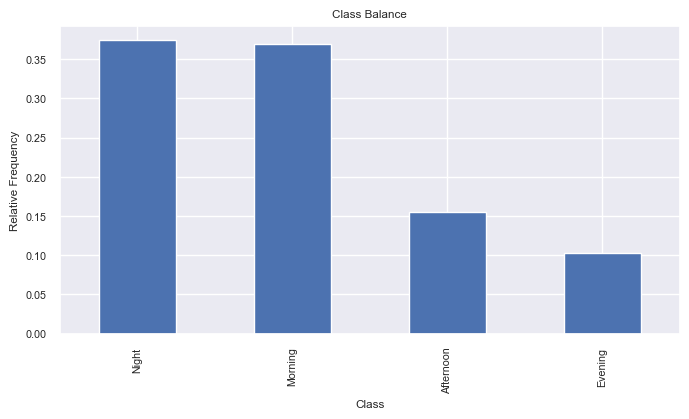

In [131]:
# Plot value counts of `"period" to confirm that the dataset is imbalanced
plt.rcParams["figure.figsize"] = (8,4)
final_df["period"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

The dataset is imbalanced

In [132]:
# Oversampling using RandomOverSampler
over_sampler_period = RandomOverSampler(random_state=20)
X_train3_with_pred_over, y_train_period1_over = over_sampler_period.fit_resample(X_train3_with_pred_ord, y_train_period1_ord)
print("X_train3_with_pred_over shape:", X_train3_with_pred_over.shape)
print("y_train_period1_over shape:", y_train_period1_over.shape)
X_train3_with_pred_over.head()

X_train3_with_pred_over shape: (7360, 8)
y_train_period1_over shape: (7360,)


,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted
0,1,1,1,1,1,1,2,1
1,1,2,2,2,2,2,4,1
2,1,3,2,3,3,1,1,1
3,1,2,3,4,1,2,11,1
4,1,1,4,5,4,2,1,1


Baseline

In [133]:
# Calculate the maximum value count of 'violent crime' to get the baseline
acc_baseline_period = y_train_period1.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline_period, 2))

Baseline Accuracy: 0.38


('LR', array([0.19429348, 0.19565217, 0.20516304, 0.20244565, 0.16168478,
       0.21195652, 0.16711957, 0.        , 0.01630435, 0.03940217]), 0.1394, 0.081)
('DTC', array([0.49728261, 0.52038043, 0.50407609, 0.50679348, 0.44293478,
       0.50543478, 0.71059783, 0.96603261, 0.95244565, 0.90896739]), 0.6515, 0.2019)
('RFC', array([0.51630435, 0.5326087 , 0.5298913 , 0.51630435, 0.44972826,
       0.51902174, 0.72961957, 0.9375    , 0.94293478, 0.91983696]), 0.6594, 0.1918)
('KNN', array([0.37771739, 0.35054348, 0.37092391, 0.37771739, 0.32472826,
       0.36956522, 0.57880435, 0.71195652, 0.69157609, 0.49728261]), 0.4651, 0.1387)
('GRB', array([0.30570652, 0.30163043, 0.31657609, 0.3111413 , 0.28668478,
       0.32201087, 0.32880435, 0.13179348, 0.28804348, 0.22554348]), 0.2818, 0.0571)


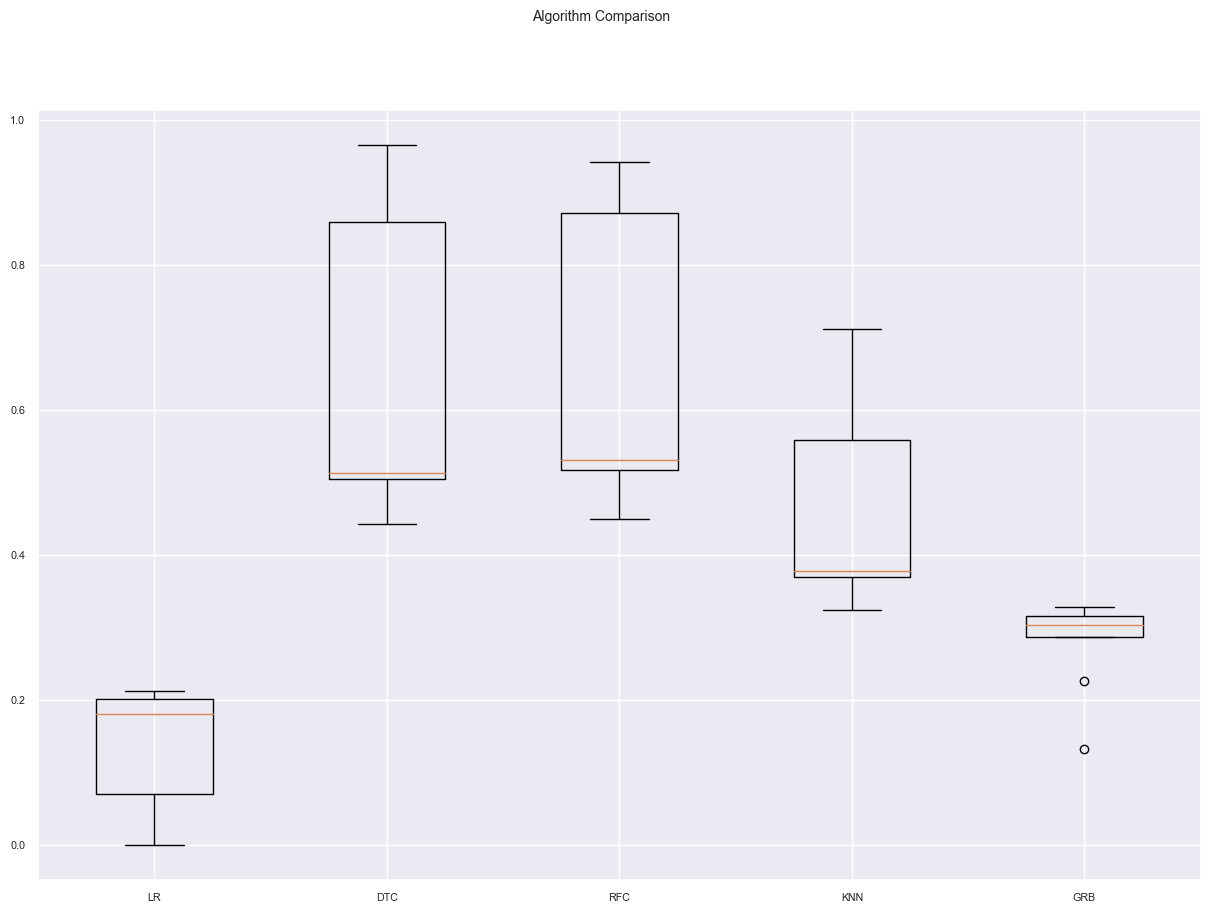

In [134]:
# Comparing Miltiple Algorithms  

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

 
X = X_train3_with_pred_over 
Y = y_train_period1_over 

numFolds = 10

models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GRB', GradientBoostingClassifier()))


# evaluate each model in turn
results = []
names = []
acc_train = []
acc_test = []

scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=numFolds)#, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results, round(cv_results.mean(), 4), round(cv_results.std(), 4)) #round(cv_results.std(), 4)
          
    
#    acc_train = (model.score(X_train_over1, y_train_pri_over)) 
#    acc_test = (model.score(X_test_over1, y_test_pri_over))
    
    print(msg)
    
#    print("Training Accuracy:", round(acc_train, 4))
#    print("Validation Accuracy:", round(acc_test, 4))
    

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



In [135]:
period_acc_baseline = y_train_period1.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(period_acc_baseline, 4))

Baseline Accuracy: 0.3833


In [136]:
period_D_clf = DecisionTreeClassifier(random_state=42, max_depth=30)
period_D_clf

DecisionTreeClassifier(max_depth=30, random_state=42)

In [137]:
period_D_clf.fit(X_train3_with_pred_over, y_train_period1_over )

DecisionTreeClassifier(max_depth=30, random_state=42)

In [138]:
period_acc_train = period_D_clf.score(X_train3_with_pred_over, y_train_period1_over)
period_acc_test = period_D_clf.score(X_test3_with_pred_ord, y_test_period1_ord)
print('acc_train:', round(period_acc_train, 4))
print('acc_test:', round(period_acc_test, 4))

acc_train: 0.9322
acc_test: 0.3022


In [139]:
'''period_D_clf_R = RandomForestClassifier(random_state=42)
period_D_clf_R'''

'period_D_clf_R = RandomForestClassifier(random_state=42)\nperiod_D_clf_R'

In [140]:
'''# Create larger figure
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=period_D_clf,
    feature_names=X_train3_with_pred_over.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    #max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);'''

'# Create larger figure\nfrom sklearn.tree import plot_tree\nfig, ax = plt.subplots(figsize=(25, 12))\n# Plot tree\nplot_tree(\n    decision_tree=period_D_clf,\n    feature_names=X_train3_with_pred_over.columns,\n    filled=True,  # Color leaf with class\n    rounded=True,  # Round leaf edges\n    proportion=True,  # Display proportion of classes in leaf\n    #max_depth=3,  # Only display first 3 levels\n    fontsize=12,  # Enlarge font\n    ax=ax,  # Place in figure axis\n);'

In [141]:
'''from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(period_D_clf,filled=True)'''

'from sklearn import tree\nplt.figure(figsize=(15,10))\ntree.plot_tree(period_D_clf,filled=True)'

In [142]:
path = period_D_clf.cost_complexity_pruning_path(X_train3_with_pred_over, y_train_period1_over)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [143]:
ccp_alphas =  [abs(c) for c in ccp_alphas]
ccp_alphas

[0.0,
 5.421010862427522e-20,
 0.0,
 4.976907150819375e-07,
 8.234519104085105e-07,
 9.70496894409827e-07,
 1.6174948240166493e-06,
 5.1759834368529526e-06,
 5.489679402722925e-06,
 5.6612318840579745e-06,
 5.6612318840579745e-06,
 5.822981366459721e-06,
 7.058159232072514e-06,
 9.057971014492803e-06,
 9.290226681530955e-06,
 1.1645962732919225e-05,
 1.2763504611330747e-05,
 1.3586956521739095e-05,
 1.3586956521739095e-05,
 1.3586956521739095e-05,
 1.3586956521739204e-05,
 1.411631846414454e-05,
 1.55279503105591e-05,
 1.55279503105591e-05,
 1.6174948240165626e-05,
 1.621170948616597e-05,
 1.6983695652173923e-05,
 1.7999814195466244e-05,
 1.8115942028985578e-05,
 1.8115942028985578e-05,
 1.8115942028985605e-05,
 2.058629776021084e-05,
 2.1615612648221368e-05,
 2.195871761089159e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.26449275362

In [144]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train3_with_pred_over, y_train_period1_over)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.001635402891784062


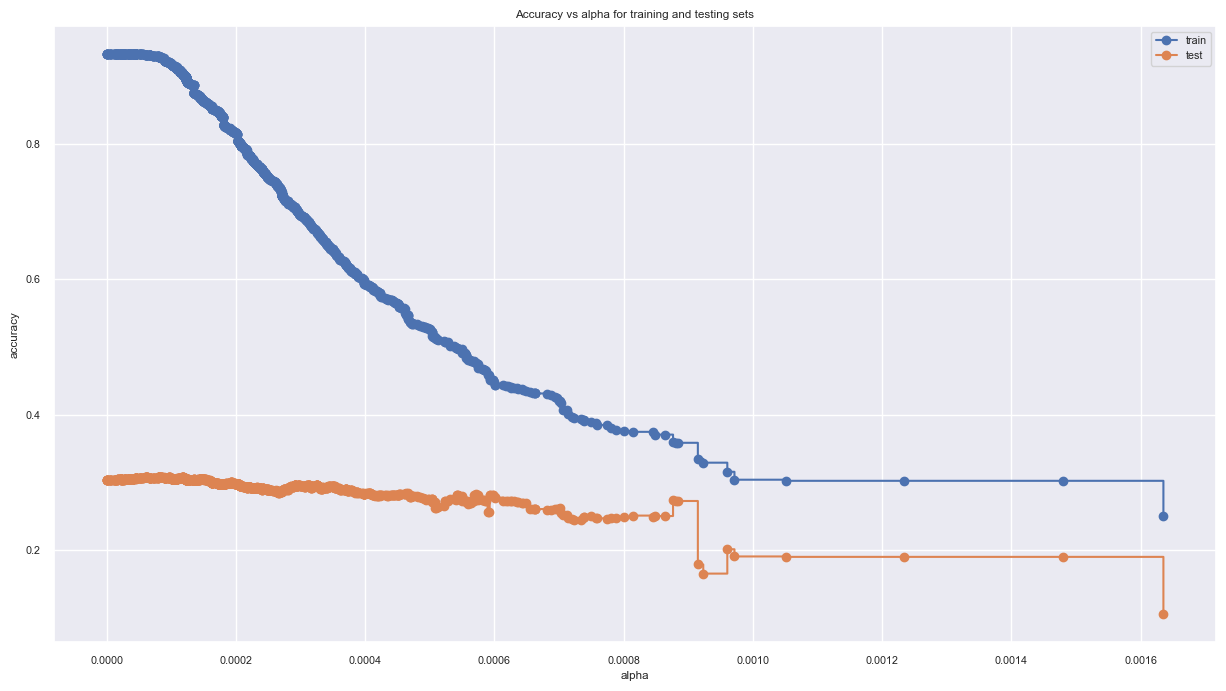

In [145]:

train_scores = [clf.score(X_train3_with_pred_over, y_train_period1_over) for clf in clfs]
test_scores = [clf.score(X_test3_with_pred_ord, y_test_period1_ord) for clf in clfs]

plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [146]:

period_clf_prun = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0012)
period_clf_prun.fit(X_train3_with_pred_over, y_train_period1_over)

DecisionTreeClassifier(ccp_alpha=0.0012, random_state=0)

In [147]:


period_acc_train_prun = period_clf_prun.score(X_train3_with_pred_over, y_train_period1_over)
period_acc_test_prun = period_clf_prun.score(X_test3_with_pred_ord, y_test_period1_ord)
print('acc_train:', round(period_acc_train_prun, 4))
print('acc_test:', round(period_acc_test_prun, 4))

acc_train: 0.3026
acc_test: 0.1903


In [ ]:
from sklearn.feature_selection import RFE

select = RFE(DecisionTreeClassifier(random_state=42),n_features_to_select=10)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [ ]:


print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
X_train.shape: (350L, 80L)
X_train_selected.shape: (350L, 10L)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

X_test_selected = select.transform(X_test)

model.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(model.score(X_test,y_test)))

model.fit(X_train_selected,y_train)
print("Scoree with selected features: {:,.3f}".format(model.score(X_test_selected,y_test)))

In [148]:
# make prediction
period_pred=clf.predict(X_test3_with_pred_ord)
period_pred

array([1, 1, 1, ..., 1, 1, 1])

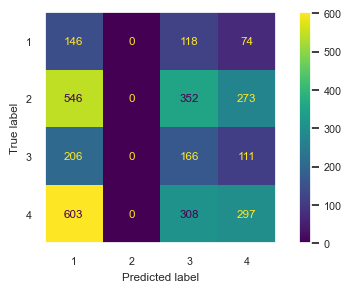

In [149]:
# Plot confusion matrix
plt.rcParams["figure.figsize"] = (6, 3)
ConfusionMatrixDisplay.from_estimator(period_clf_prun, X_test3_with_pred_ord, y_test_period1_ord);
plt.grid(False)



In [150]:
# Classification report for period prediction
print(classification_report(y_test_period1_ord, period_pred))


              precision    recall  f1-score   support

           1       0.11      1.00      0.19       338
           2       0.00      0.00      0.00      1171
           3       0.00      0.00      0.00       483
           4       0.00      0.00      0.00      1208

    accuracy                           0.11      3200
   macro avg       0.03      0.25      0.05      3200
weighted avg       0.01      0.11      0.02      3200



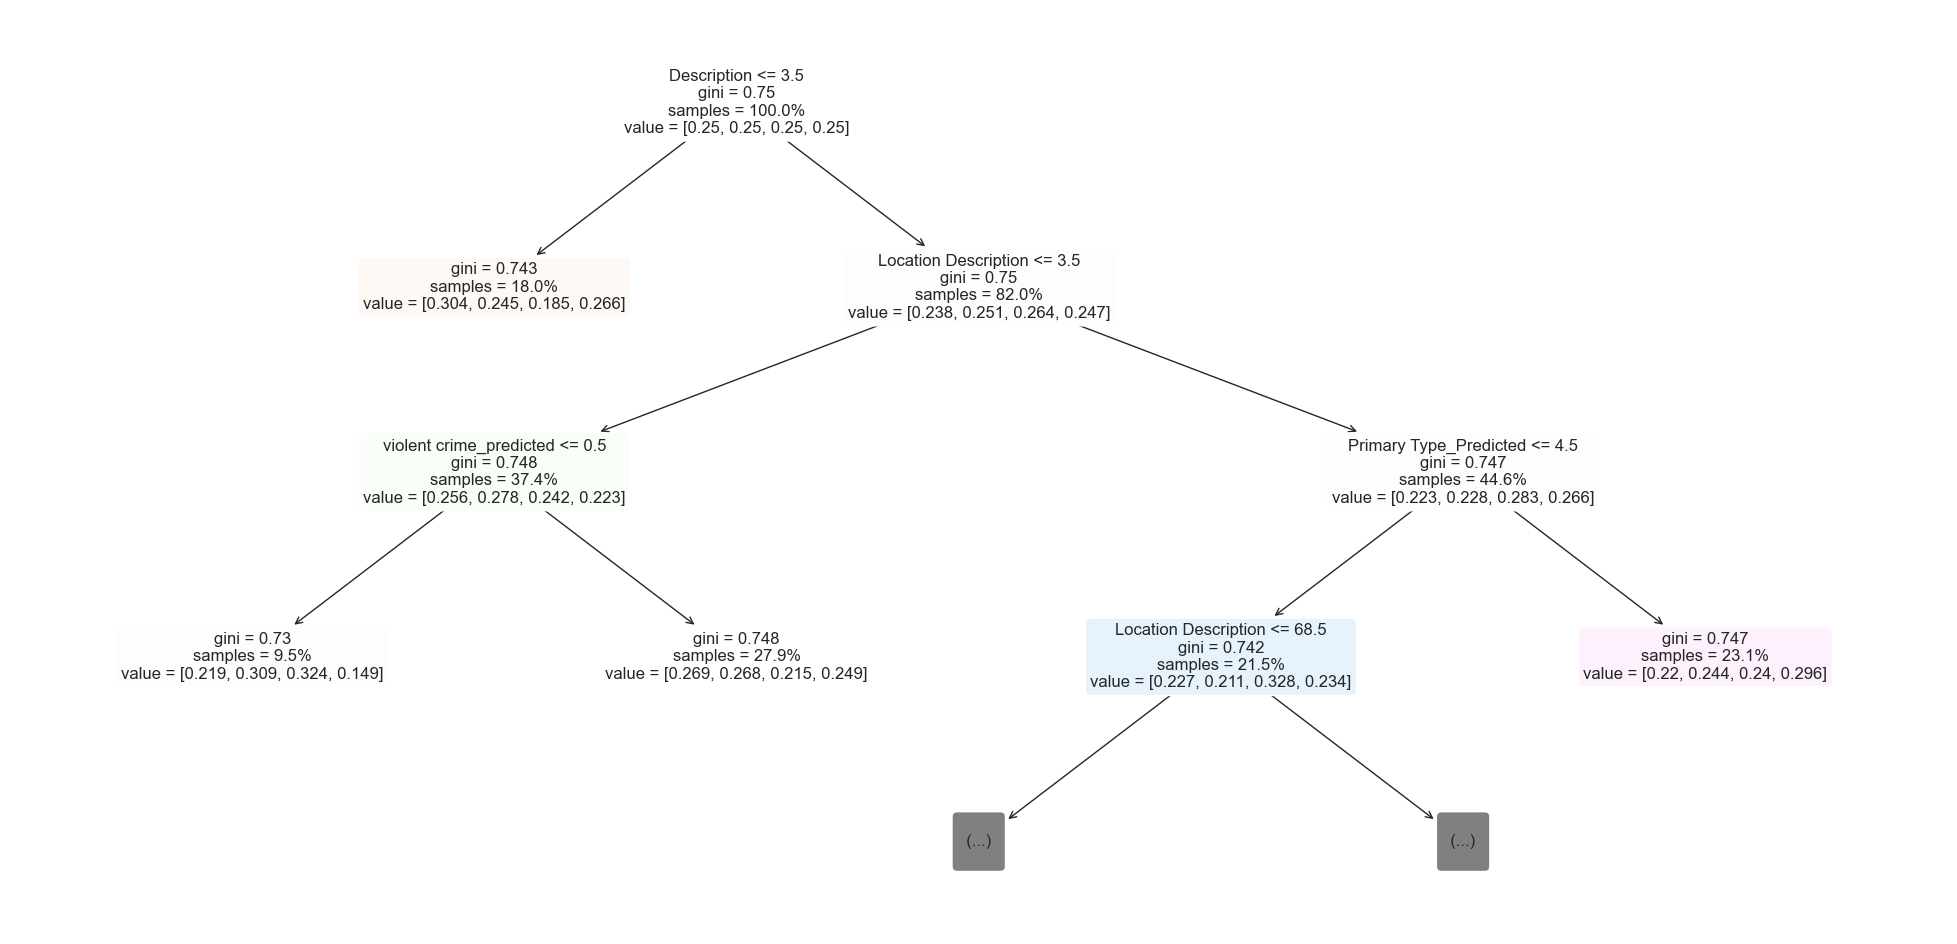

In [151]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=period_clf_prun,
    feature_names=X_train3_with_pred_over.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);



In [152]:
# Obtain the feature importances
features_period = X_train3_with_pred_over.columns
importances_period = period_clf_prun.feature_importances_
print("Features:", features_period[:3])
print("Importances:", importances_period[:3])



Features: Index(['Domestic', 'month', 'day'], dtype='object')
Importances: [0. 0. 0.]


In [153]:
# Convert feature importances to dataframe
feat_imp_period = pd.Series(importances_period, index=features_period).sort_values()
feat_imp_period



Domestic                   0.000000
month                      0.000000
day                        0.000000
Arrest                     0.000000
Description                0.177578
violent crime_predicted    0.204174
Primary Type_Predicted     0.291438
Location Description       0.326810
dtype: float64

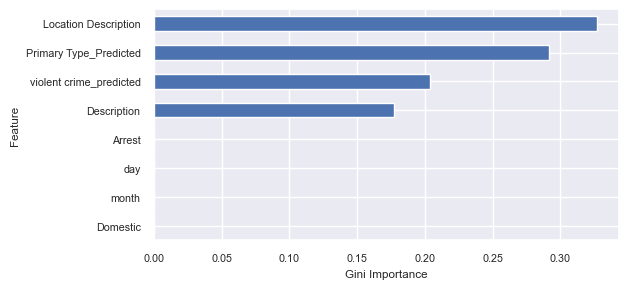

In [154]:
# Create horizontal bar chart of feature importance of violent crime pediction+
feat_imp_period.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");



# Split the Train and Test data for 'District' model

In [155]:
# Split the 'final_df' dataset into X3 features and 'District' as target variables 
X4 = final_df[['Domestic', 'month', 'day', 'Description', 'Location Description', 'Arrest']]
y_District = final_df['District']

print('X4 shape: ', X4.shape)                           
print('y_District shape: ', y_District.shape)

X4 shape:  (20000, 6)
y_District shape:  (20000,)


In [156]:
# Split the dataset into train and test data
X_train4, X_test4, y_train_District, y_test_District = train_test_split(X4, y_District, test_size=0.4, random_state=20)

print('X_train4 shape: ', X_train4.shape)
print('y_train_District shape: ', y_train_District.shape)
print('X_test4 shape: ', X_test4.shape)
print('y_test_District shape: ', y_test_District.shape)

X_train4 shape:  (12000, 6)
y_train_District shape:  (12000,)
X_test4 shape:  (8000, 6)
y_test_District shape:  (8000,)


In [157]:
# Add the primary type prediction and the violent crime prediction to the X_test4 dataset
Dict_pred = {'Primary Type_Predicted': y_pri_pred, 'violent crime_predicted': y_v_crime_pred}
X_test4[['Primary Type_Predicted', 'violent crime_predicted']] = pd.DataFrame(Dict_pred, index=X_test3.index)
X_test4.head()

,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted
9812,False,Mar,Sat,ATTEMPT THEFT,STREET,False,1,1
7615,False,Oct,Wed,CREDIT CARD FRAUD,RESIDENCE-GARAGE,False,9,0
14799,False,Nov,Tue,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,1,1
16457,False,Jan,Thu,TO PROPERTY,RESIDENCE,False,3,1
6563,False,Jan,Fri,UNLAWFUL ENTRY,RESIDENCE,False,12,1


In [158]:
# Split the X_test4 and y_test_District dataset into train and test data again with thesame random state in order to get the dataset with thesame values as the previous
X_train4_1, X_test4_1, y_train_District1, y_test_District1 = train_test_split(X_test4, y_test_District, test_size=0.4, random_state=20)

print('X_train4_1 shape: ', X_train4_1.shape)
print('y_train_District1: ', y_train_District1.shape)
print('X_test4_1: ', X_test4_1.shape)
print('y_test_District1 shape: ', y_test_District1.shape)

X_train4_1 shape:  (4800, 8)
y_train_District1:  (4800,)
X_test4_1:  (3200, 8)
y_test_District1 shape:  (3200,)


In [159]:
# Add the period prediction prediction to the X_test4_1 dataset
Dict_pred = {'Primary Type_Predicted': y_pri_pred, 'violent crime_predicted': y_v_crime_pred}
X_test4_1['period_predicted'] = period_pred
X_test4_1.head()

,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted,period_predicted
9555,False,Oct,Fri,OTHER,SIDEWALK,True,16,0,1
8165,False,Feb,Fri,$500 AND UNDER,STREET,False,1,1,1
4109,False,May,Tue,TO AIRPORT,OTHER,True,7,0,1
18026,False,Feb,Mon,SOLICIT NARCOTICS ON PUBLICWAY,CHA PARKING LOT/GROUNDS,True,7,0,1
18156,False,Jul,Mon,CRIMINAL DEFACEMENT,DEPARTMENT STORE,False,3,1,1


In [160]:
# Split the X_test4_1 and y_test_District1  into the final train and test data with prediction
X_train4_with_pred, X_test4_with_pred, y_train_district2, y_test_district2 = train_test_split(X_test4_1, y_test_District1, test_size=0.2, random_state=20)

print('X_train4_with_pred shape: ', X_train4_with_pred.shape)
print('y_train_district2 shape: ', y_train_district2.shape)
print('X_test4_with_pred shape: ', X_test4_with_pred.shape) 
print('y_test_district2 shape: ', y_test_district2.shape)   

X_train4_with_pred shape:  (2560, 9)
y_train_district2 shape:  (2560,)
X_test4_with_pred shape:  (640, 9)
y_test_district2 shape:  (640,)


In [161]:
print(y_train_district2)
X_train4_with_pred.head()

14380     4.0
8775      5.0
15632     9.0
10011    11.0
14837     4.0
         ... 
10171    25.0
9805     10.0
14795    24.0
9434     11.0
12870     2.0
Name: District, Length: 2560, dtype: float64


,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted,period_predicted
14380,False,Oct,Wed,SIMPLE,ALLEY,False,2,1,1
8775,True,Aug,Thu,AGGRAVATED DOMESTIC BATTERY,RESIDENCE,True,2,1,1
15632,False,Mar,Fri,CRIMINAL DEFACEMENT,"SCHOOL, PUBLIC, BUILDING",True,3,1,1
10011,False,Jul,Tue,TO PROPERTY,APARTMENT,False,3,1,1
14837,False,Jun,Sun,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,12,1,1


# Encode the categorical variables

In [162]:
# Ordinal Encode the X_train and X_test
ordn4 = OrdinalEncoder(cols=['Domestic', 'month', 'day', 'Description', 'Location Description', 'Arrest'], return_df=True)
X_train4_ord = ordn4.fit_transform(X_train4_with_pred) 
X_test4_ord = ordn4.transform(X_test4_with_pred) 
print(X_train4_ord.shape)   
X_train4_ord.head() 

(2560, 9)


,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted,period_predicted
14380,1,1,1,1,1,1,2,1,1
8775,2,2,2,2,2,2,2,1,1
15632,1,3,3,3,3,2,3,1,1
10011,1,4,4,4,4,1,3,1,1
14837,1,5,5,5,5,1,12,1,1


# Oversample the dataset

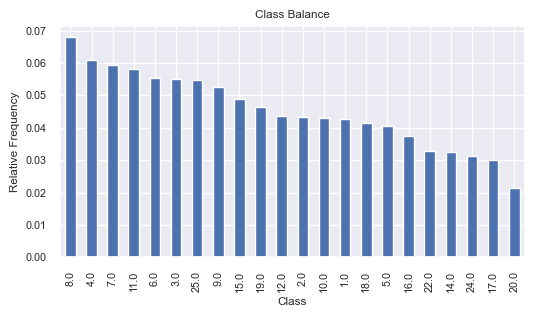

In [163]:
# Plot value counts of `"period" to confirm that the dataset is imbalanced
y_train_district2.value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"  
);

In [164]:
# Oversampling using RandomOverSampler
over_sampler_district = RandomOverSampler(random_state=20)
X_train4_over, y_train_district_over = over_sampler_district.fit_resample(X_train4_ord, y_train_district2)
print("X_train4_over shape:", X_train4_over.shape)
print("y_train_district_over shape:", y_train_district_over.shape)                    
X_train4_over.head()


X_train4_over shape: (3828, 9)
y_train_district_over shape: (3828,)


,Domestic,month,day,Description,Location Description,Arrest,Primary Type_Predicted,violent crime_predicted,period_predicted
0,1,1,1,1,1,1,2,1,1
1,2,2,2,2,2,2,2,1,1
2,1,3,3,3,3,2,3,1,1
3,1,4,4,4,4,1,3,1,1
4,1,5,5,5,5,1,12,1,1


In [165]:
# Calculate the maximum value count of 'violent crime' to get the baseline
acc_baseline_district = y_train_district2.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline_district, 2))

Baseline Accuracy: 0.07


('LR', array([0.07832898, 0.06527415, 0.05221932, 0.06266319, 0.04177546,
       0.06005222, 0.05483029, 0.0078329 , 0.        , 0.        ]), 0.0423, 0.0275)
('DTC', array([0.34725849, 0.33159269, 0.37597911, 0.32637076, 0.35770235,
       0.37336815, 0.51697128, 0.94778068, 0.89005236, 0.90052356]), 0.5368, 0.2517)
('RFC', array([0.34464752, 0.32898172, 0.37075718, 0.33942559, 0.34725849,
       0.37336815, 0.50652742, 0.95039164, 0.90837696, 0.92670157]), 0.5396, 0.2591)
('KNN', array([0.17754569, 0.14360313, 0.17493473, 0.13577023, 0.14882507,
       0.1618799 , 0.18798956, 0.23498695, 0.13874346, 0.08115183]), 0.1585, 0.0382)
('GRB', array([0.16449086, 0.18276762, 0.21409922, 0.19321149, 0.18798956,
       0.20887728, 0.24020888, 0.42036554, 0.38219895, 0.42670157]), 0.2621, 0.0991)


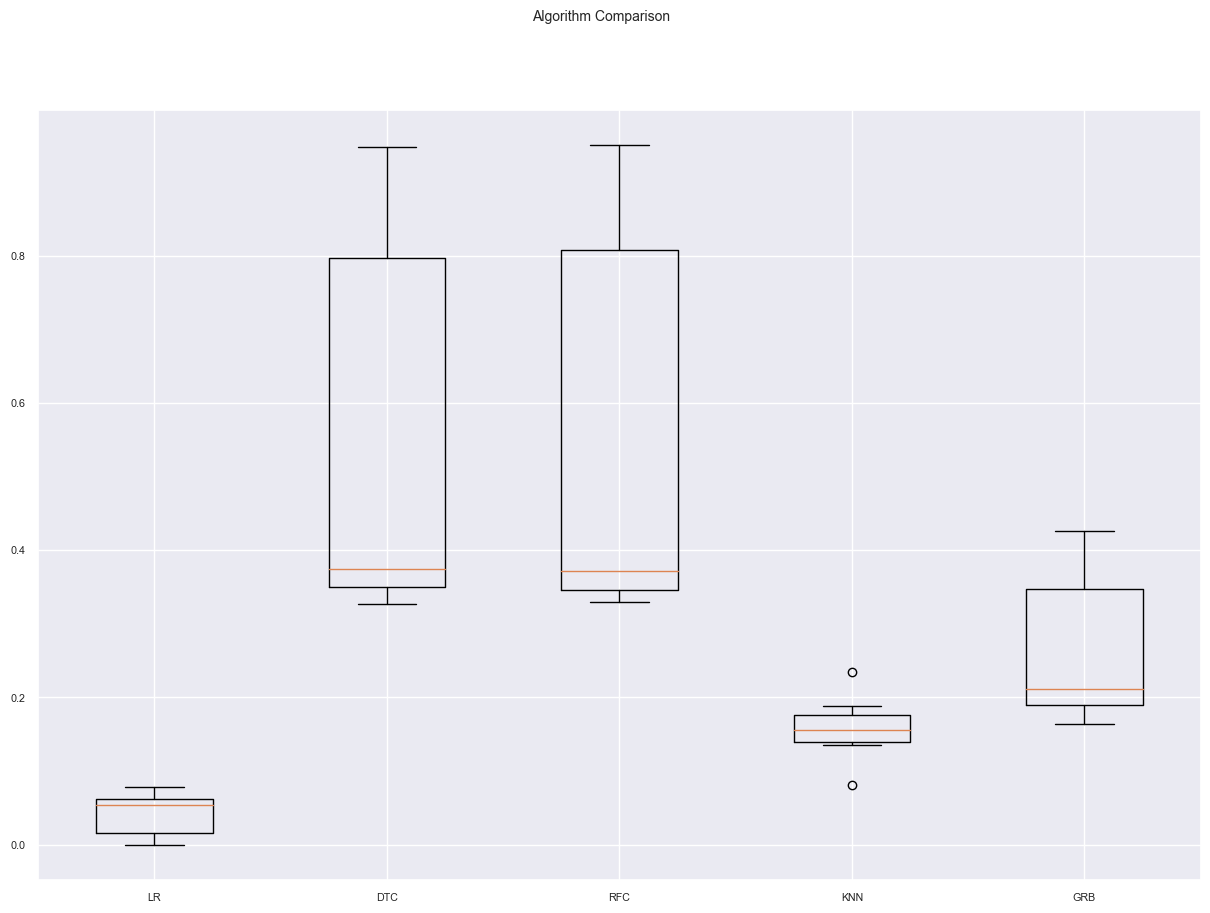

In [166]:
# Comparing Miltiple Algorithms  
 
X = X_train4_over 
Y = y_train_district_over 

numFolds = 10

models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GRB', GradientBoostingClassifier()))


# evaluate each model in turn
results = []
names = []
acc_train = []
acc_test = []

scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=numFolds)#, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results, round(cv_results.mean(), 4), round(cv_results.std(), 4)) #round(cv_results.std(), 4)
          
    
#    acc_train = (model.score(X_train_over1, y_train_pri_over)) 
#    acc_test = (model.score(X_test_over1, y_test_pri_over))
    
    print(msg)
    
#    print("Training Accuracy:", round(acc_train, 4))
#    print("Validation Accuracy:", round(acc_test, 4))
    

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



In [167]:
district_D_CLF = DecisionTreeClassifier(random_state=42, max_depth=30)   
 

In [168]:
district_cv_acc_scores = cross_val_score(district_D_CLF, X_train4_over, y_train_district_over, cv=5, n_jobs=-1)
print(district_cv_acc_scores)

[0.39817232 0.38903394 0.4386423  0.60915033 0.83921569]


In [169]:
district_D_CLF.fit(X_train4_over, y_train_district_over)

DecisionTreeClassifier(max_depth=30, random_state=42)

In [170]:
# check the accuracy
district_acc_train = district_D_CLF.score(X_train4_over, y_train_district_over)
district_acc_test = district_D_CLF.score(X_test4_ord, y_test_district2)
print('acc_train:', round(district_acc_train, 4))
print('acc_test:', round(district_acc_test, 4))

acc_train: 0.9412
acc_test: 0.0688


In [171]:
district_path = district_D_CLF.cost_complexity_pruning_path(X_train4_over, y_train_district_over)
district_ccp_alphas, district_impurities = path.ccp_alphas, path.impurities

In [172]:
district_ccp_alphas =  [abs(c) for c in district_ccp_alphas]
district_ccp_alphas

[0.0,
 5.421010862427522e-20,
 0.0,
 4.976907150819375e-07,
 8.234519104085105e-07,
 9.70496894409827e-07,
 1.6174948240166493e-06,
 5.1759834368529526e-06,
 5.489679402722925e-06,
 5.6612318840579745e-06,
 5.6612318840579745e-06,
 5.822981366459721e-06,
 7.058159232072514e-06,
 9.057971014492803e-06,
 9.290226681530955e-06,
 1.1645962732919225e-05,
 1.2763504611330747e-05,
 1.3586956521739095e-05,
 1.3586956521739095e-05,
 1.3586956521739095e-05,
 1.3586956521739204e-05,
 1.411631846414454e-05,
 1.55279503105591e-05,
 1.55279503105591e-05,
 1.6174948240165626e-05,
 1.621170948616597e-05,
 1.6983695652173923e-05,
 1.7999814195466244e-05,
 1.8115942028985578e-05,
 1.8115942028985578e-05,
 1.8115942028985605e-05,
 2.058629776021084e-05,
 2.1615612648221368e-05,
 2.195871761089159e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.264492753623187e-05,
 2.26449275362

In [173]:
district_clfs = []
for ccp_alpha in district_ccp_alphas:
    district_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    district_clf.fit(X_train4_over, y_train_district_over)
    district_clfs.append(district_clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      district_clfs[-1].tree_.node_count, district_ccp_alphas[-1]))


Number of nodes in the last tree is: 5 with ccp_alpha: 0.001635402891784062


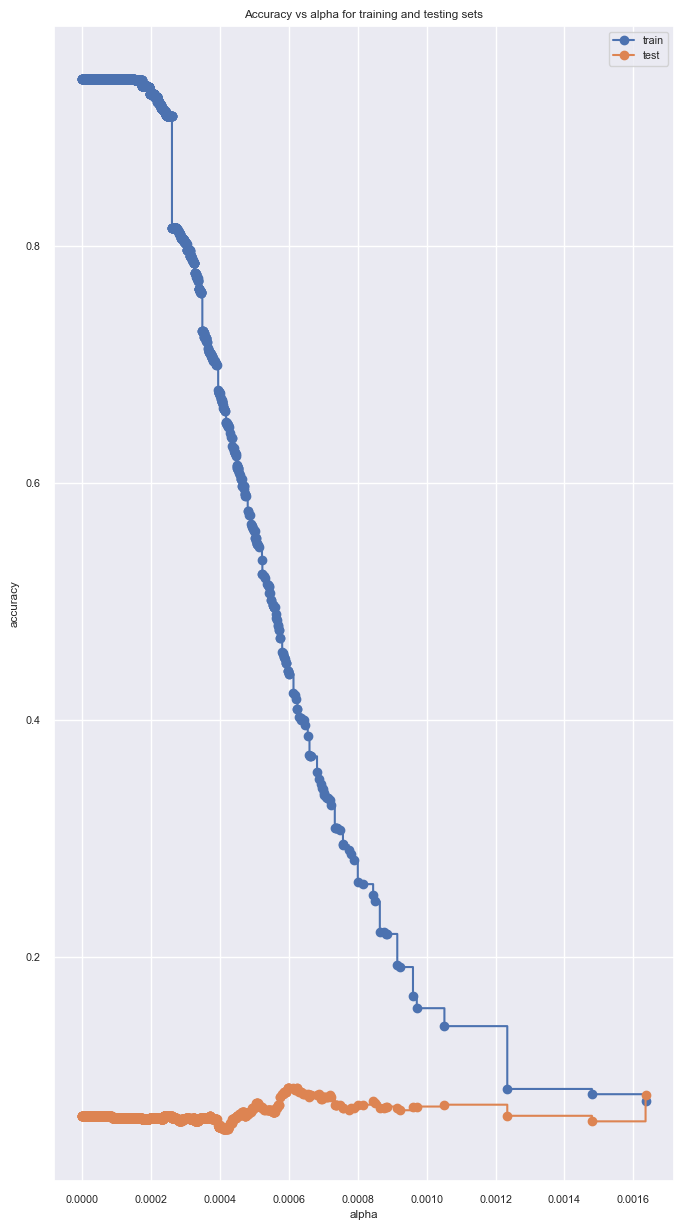

In [174]:
district_train_scores = [clf.score(X_train4_over, y_train_district_over) for clf in district_clfs]
ditrict_test_scores = [clf.score(X_test4_ord, y_test_district2) for clf in district_clfs]

plt.rcParams["figure.figsize"] = (8,15)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(district_ccp_alphas, district_train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(district_ccp_alphas, ditrict_test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [175]:
district_clf_prun = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00122)
district_clf_prun.fit(X_train4_over, y_train_district_over)

DecisionTreeClassifier(ccp_alpha=0.00122, random_state=0)

In [184]:
district_acc_train_prun = district_clf_prun.score(X_train4_over, y_train_district_over)
district_acc_test_prun = district_clf_prun.score(X_test4_ord, y_test_district2)
print('acc_train:', round(district_acc_train_prun, 4))
print('acc_test:', round(district_acc_test_prun, 4))

acc_train: 0.0883
acc_test: 0.0656


In [177]:
# make prediction
district_pred=district_clf_prun.predict(X_test4_ord)
district_pred

array([17., 17.,  1.,  5.,  1., 17.,  5.,  1., 17.,  5., 17.,  5.,  1.,
        1.,  1.,  5., 17., 17.,  5., 17., 17.,  5., 17.,  1.,  1.,  3.,
        1.,  5.,  1., 17.,  1., 17., 17.,  1.,  1.,  1.,  5., 17., 17.,
        5., 16.,  1.,  5.,  1., 17., 17., 16., 17., 17., 17.,  1.,  3.,
        5.,  5., 17.,  5., 17., 16.,  3.,  5.,  5., 17.,  1., 17.,  3.,
        5.,  1.,  1., 17.,  1.,  3.,  5.,  1.,  5., 17., 17., 17., 17.,
       17.,  3.,  5., 17., 17.,  3., 17., 17., 17.,  3.,  1.,  1.,  1.,
        1., 17., 16., 17.,  1.,  3.,  1., 17., 17., 17.,  5., 17., 17.,
        1.,  1.,  3.,  1.,  1.,  1.,  5., 17., 17.,  1.,  1.,  5., 17.,
       17.,  5.,  3.,  1.,  1.,  5.,  1., 17.,  3., 17.,  3., 17.,  1.,
        5.,  1.,  1.,  1., 17.,  1.,  3., 17.,  5.,  5., 17., 17., 17.,
       17., 17.,  1.,  1.,  5., 17., 17.,  1., 17., 17.,  5.,  3., 17.,
       17., 17.,  1., 17., 17.,  1.,  1.,  5.,  1.,  5.,  3.,  1.,  1.,
        3., 17.,  5.,  5.,  5., 17., 17., 16.,  3.,  5.,  5.,  5

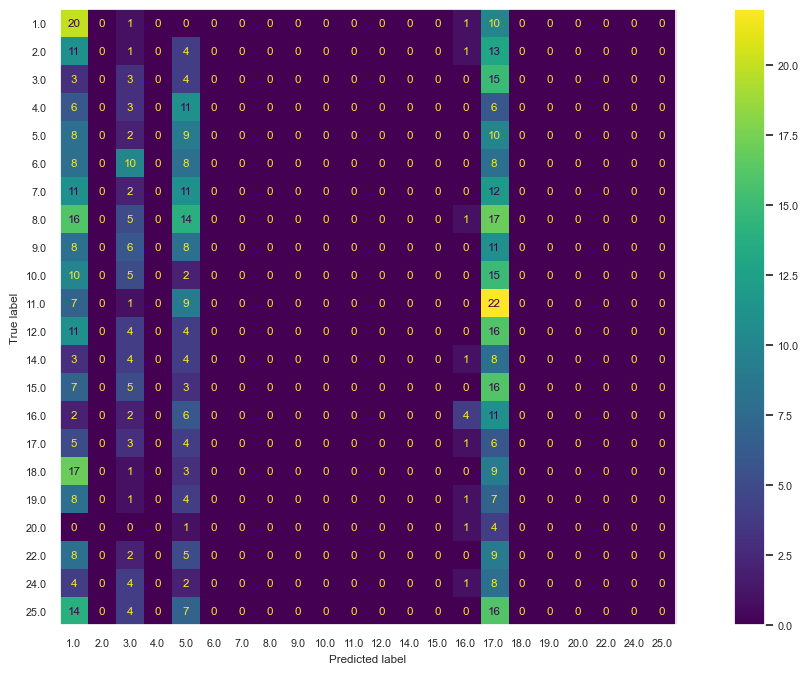

In [178]:
# Plot confusion matrix
plt.rcParams["figure.figsize"] = (15, 8)   
ConfusionMatrixDisplay.from_estimator(district_clf_prun, X_test4_ord, y_test_district2);
plt.grid(False)

In [179]:
# Classification report for period prediction
print(classification_report(y_test_district2, district_pred))

              precision    recall  f1-score   support

         1.0       0.11      0.62      0.18        32
         2.0       0.00      0.00      0.00        30
         3.0       0.04      0.12      0.06        25
         4.0       0.00      0.00      0.00        26
         5.0       0.07      0.31      0.12        29
         6.0       0.00      0.00      0.00        34
         7.0       0.00      0.00      0.00        36
         8.0       0.00      0.00      0.00        53
         9.0       0.00      0.00      0.00        33
        10.0       0.00      0.00      0.00        32
        11.0       0.00      0.00      0.00        39
        12.0       0.00      0.00      0.00        35
        14.0       0.00      0.00      0.00        20
        15.0       0.00      0.00      0.00        31
        16.0       0.33      0.16      0.22        25
        17.0       0.02      0.32      0.04        19
        18.0       0.00      0.00      0.00        30
        19.0       0.00    

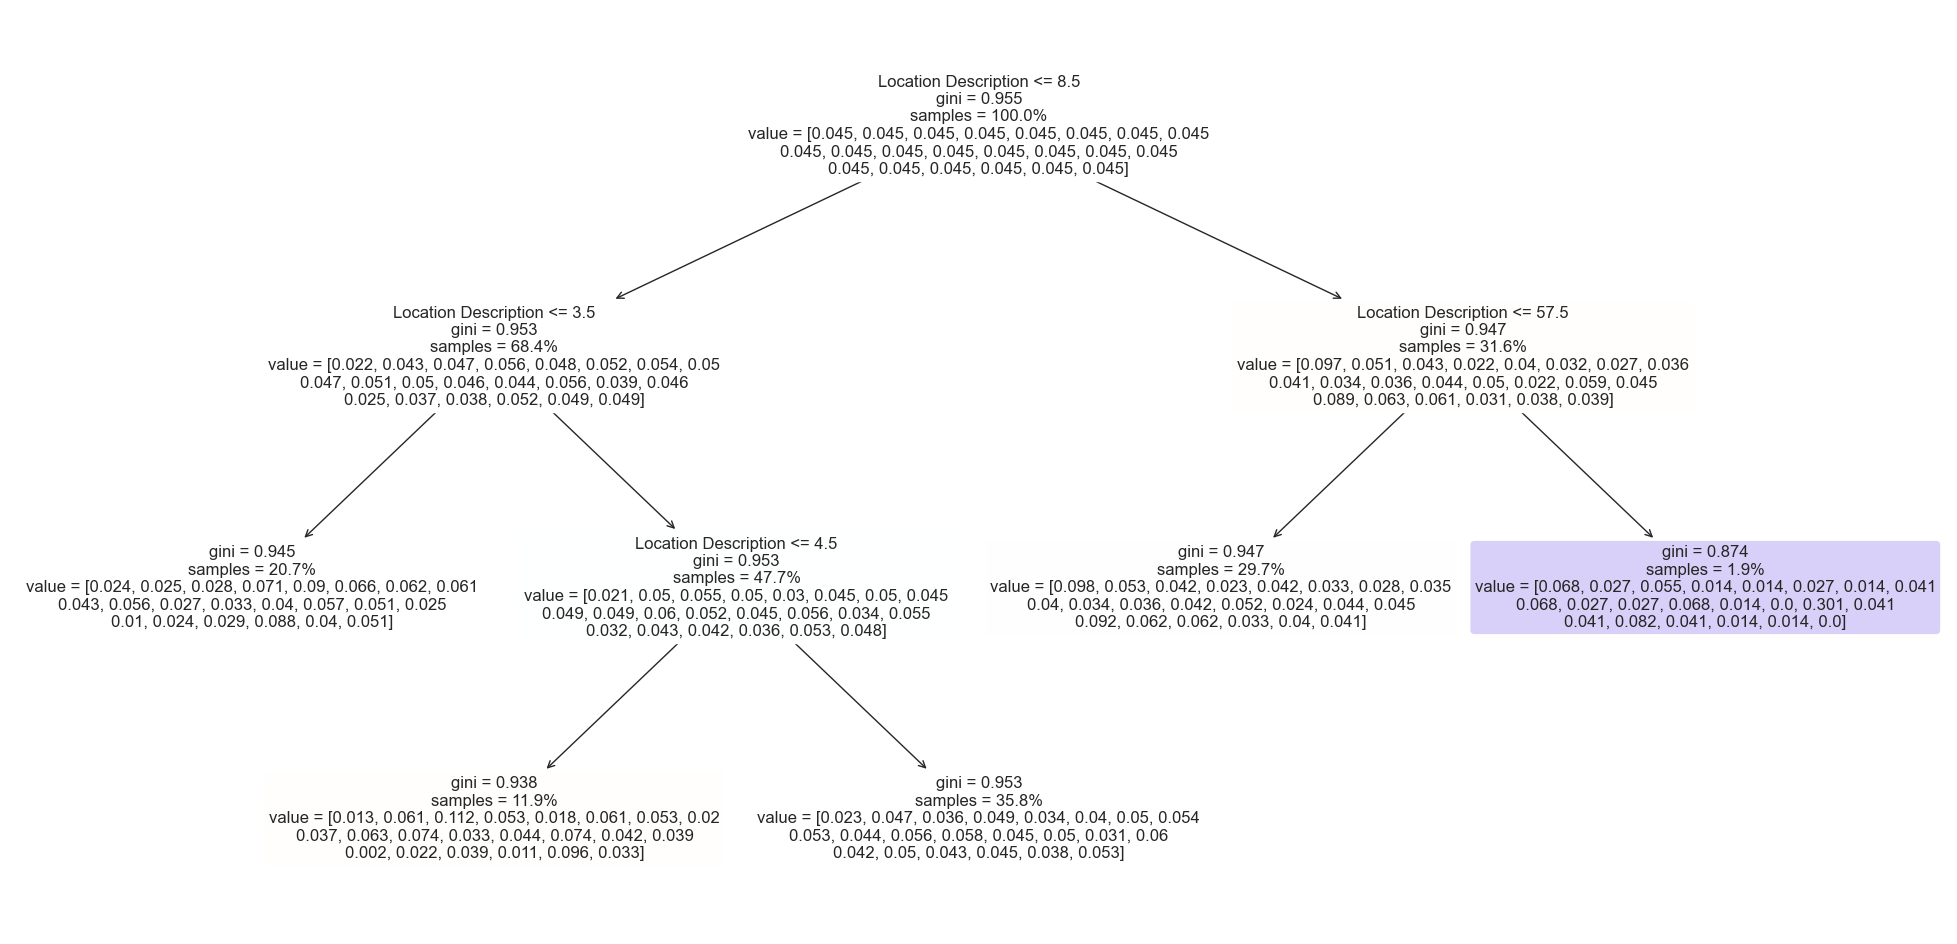

In [180]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=district_clf_prun,
    feature_names=X_train4_over.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [181]:
# Obtain the feature importances
features_district = X_train4_over.columns
importances_district = district_clf_prun.feature_importances_
print("Features:", features_district[:3])
print("Importances:", importances_district[:3])  

Features: Index(['Domestic', 'month', 'day'], dtype='object')
Importances: [0. 0. 0.]


In [182]:
# Convert feature importances to dataframe
feat_imp_district = pd.Series(importances_district, index=features_district).sort_values()
feat_imp_district

Domestic                   0.0
month                      0.0
day                        0.0
Description                0.0
Arrest                     0.0
Primary Type_Predicted     0.0
violent crime_predicted    0.0
period_predicted           0.0
Location Description       1.0
dtype: float64

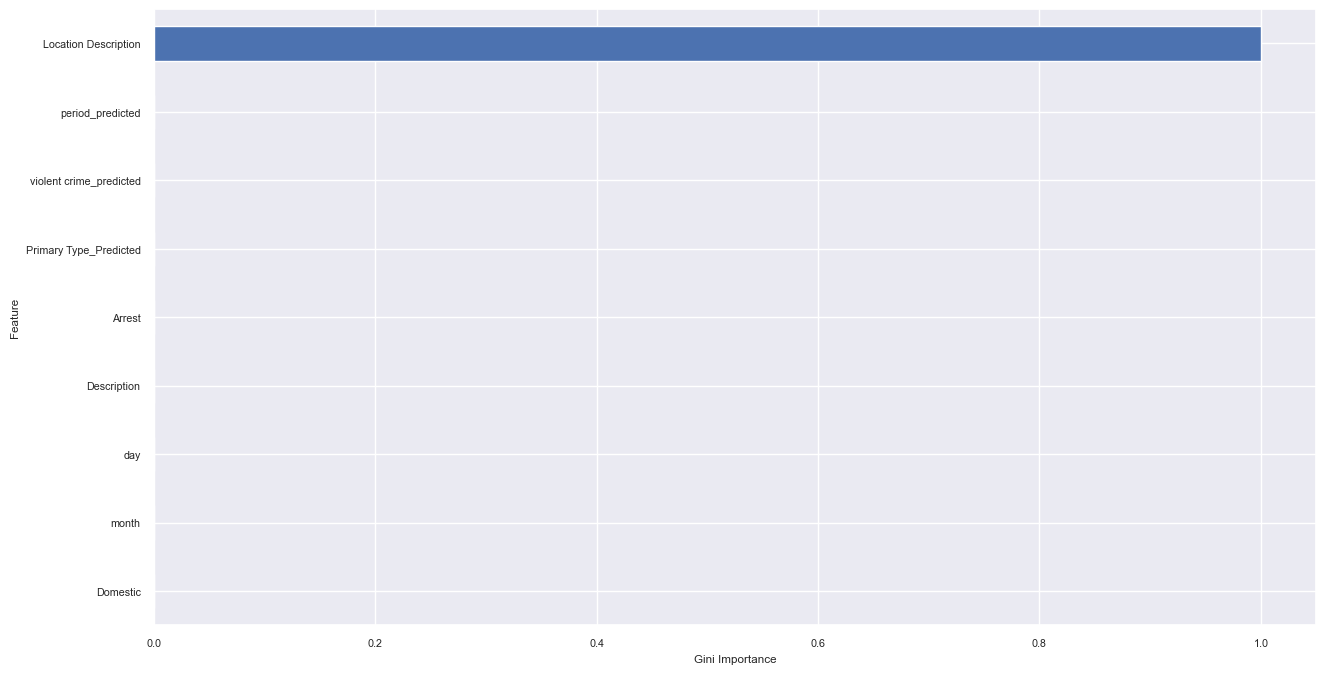

In [183]:
# Create horizontal bar chart of feature importance of violent crime pediction+
feat_imp_district.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");